In [7]:
!pip install -r requirements.txt
!pip install gspread --upgrade
!pip install gspread_pandas --upgrade


Requirement already up-to-date: gspread in /opt/conda/lib/python3.9/site-packages (5.3.2)
  Using cached gspread_pandas-3.2.0-py2.py3-none-any.whl (26 kB)
  Attempting uninstall: gspread-pandas
    Found existing installation: gspread-pandas 2.3.0
    Uninstalling gspread-pandas-2.3.0:
      Successfully uninstalled gspread-pandas-2.3.0


### From Sheet to DataFrame



We begin by defining a dictionary that contains the spreadsheet key.

In [8]:
nigeria_data = '17L5cDhXRLNAckP3JvBLTLSYIguFqP2ebMvQLH96c0n4'
nigeria_production = '1kG_fVBmj9EEF9LOwxN30HBxkQENOoWeQjVPYzMJe3b4-8DA'
nigeria_consumption = '1kG_fVBmj9EEF9LOwxN30HBxkQENOoWeQjVPYzMJe3b4'

With the spreadsheet defined, grab it and define a couple of
dataframes.



In [9]:
import pandas as pd
import numpy as np
import sys
from eep153_tools.sheets import read_sheets

expend = read_sheets(nigeria_data,sheet='Expenditures')
expend.columns.name = 'i'
                 
# Change 'ICRISAT' to key of your own sheet in Sheets, above
hh_char = read_sheets(nigeria_data,sheet="HH Characteristics")
hh_char.columns.name = 'k'

# Assume a single market: (Comment this out to make each village its own market)
hh_char['m'] = 1
expend['m'] = 1

# x may have duplicate columns
expend = expend.groupby('i',axis=1).sum()
expend = expend.apply(lambda x: pd.to_numeric(x,errors='coerce'))
expend = expend.replace(0,np.nan)

# Take logs of expenditures; call this y
log_expend = np.log(expend.set_index(['j','t','m']))
           
hh_char.set_index(['j','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


Sort the new Data Frame in order to group by year.

In [10]:
expend = expend.set_index(['t','j','m']).sort_index()
expend = expend.replace(0.0,np.nan) # Replace zeroes with np.nan
expend

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10001  1                      NaN              280.0         NaN     NaN   
     10002  1                      NaN              280.0         NaN     NaN   
     10003  1                      NaN              180.0         NaN     NaN   
     10004  1                      NaN              180.0         NaN     NaN   
     10006  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379146 1                      NaN             1100.0         NaN     NaN   
     379148 1                    100.0                NaN         NaN     NaN   
     379151 1                      NaN              900.0         NaN     NaN   
     379154 1                    200.0             1200.0         NaN     NaN   
     379155 1                    100.0              950.0         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas    Beef  \
t    j      m                                                    
2010 10001  1           NaN               NaN    200.0   500.0   
     10002  1           NaN               NaN    180.0  1200.0   
     10003  1           NaN               NaN    100.0   500.0   
     10004  1           NaN               NaN    100.0   500.0   
     10006  1           NaN               NaN    300.0   300.0   
...                     ...               ...      ...     ...   
2018 379146 1           NaN               NaN      NaN     NaN   
     379148 1           NaN               NaN      NaN   700.0   
     379151 1           NaN               NaN    500.0     NaN   
     379154 1           NaN               NaN      NaN  1300.0   
     379155 1           NaN               NaN      NaN  1400.0   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10001  1                      540.0       NaN  ...           150.0   
     10002  1                     2000.0       NaN  ...           200.0   
     10003  1                        NaN       NaN  ...           200.0   
     10004  1                        NaN       NaN  ...             NaN   
     10006  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379146 1                        NaN       NaN  ...             NaN   
     379148 1                        NaN       NaN  ...             NaN   
     379151 1                        NaN       NaN  ...             NaN   
     379154 1                        NaN       NaN  ...             NaN   
     379155 1                        NaN       NaN  ...             NaN   

i                Tea  Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                                   
2010 10001  1    NaN                 150.0     150.0         NaN          NaN   
     10002  1  140.0                 240.0     120.0         NaN          NaN   
     10003  1   60.0                  90.0     100.0         NaN          NaN   
     10004  1   30.0                  60.0     100.0         NaN          NaN   
     10006  1  650.0                   NaN     400.0         NaN          NaN   
...              ...                   ...       ...         ...          ...   
2018 379146 1    NaN                   NaN       NaN       500.0          NaN   
     379148 1    NaN                  60.0     200.0       150.0          NaN   
     379151 1    NaN                 150.0     600.0       600.0        750.0   
     379154 1    NaN                   NaN     100.0       200.0          NaN   
     379155 1    NaN                   NaN     300.0       200.0          NaN   

i              White beans  Wild game meat  Yam flour  Ya

# People per Household, Total Expenditures, and Expenditures per Capita

Use the household data to calculate the number of people per household.

In [11]:
people = hh_char.sum(axis=1)
num_people = pd.DataFrame(people)
num_people = num_people.rename(columns={0:'People per HH'})
num_people = num_people.reset_index().set_index(['t','j','m']).sort_index()
num_people

People per HH
t    j      m               
2010 10001  1              7
     10002  1              7
     10003  1              6
     10004  1              3
     10006  1              3
...                      ...
2018 379146 1              4
     379148 1              1
     379151 1              5
     379154 1              2
     379155 1              4

[19249 rows x 1 columns]

Aggregate the expenditure data to find the total expenditures for each household.

In [12]:
total_expend = expend.iloc[:, 0:124].sum(axis=1)
total = pd.DataFrame(total_expend)
total = total.rename(columns={0:'Total Expenditures'})
total

Total Expenditures
t    j      m                    
2010 10001  1             20225.0
     10002  1             15365.0
     10003  1              4675.0
     10004  1              4465.0
     10006  1              7565.0
...                           ...
2018 379146 1             31100.0
     379148 1              6410.0
     379151 1             20540.0
     379154 1             22650.0
     379155 1              7550.0

[19141 rows x 1 columns]

Add the total expenditures and people per household information to the dataframe. Then, use these columns to add an expenditures per capita column as well.

In [13]:
expend['Total Expenditures'] = total['Total Expenditures']
expend['People per HH'] = num_people['People per HH']
expend['Expenditures per capita'] = expend['Total Expenditures'] / expend['People per HH']
expend

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10001  1                      NaN              280.0         NaN     NaN   
     10002  1                      NaN              280.0         NaN     NaN   
     10003  1                      NaN              180.0         NaN     NaN   
     10004  1                      NaN              180.0         NaN     NaN   
     10006  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379146 1                      NaN             1100.0         NaN     NaN   
     379148 1                    100.0                NaN         NaN     NaN   
     379151 1                      NaN              900.0         NaN     NaN   
     379154 1                    200.0             1200.0         NaN     NaN   
     379155 1                    100.0              950.0         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas    Beef  \
t    j      m                                                    
2010 10001  1           NaN               NaN    200.0   500.0   
     10002  1           NaN               NaN    180.0  1200.0   
     10003  1           NaN               NaN    100.0   500.0   
     10004  1           NaN               NaN    100.0   500.0   
     10006  1           NaN               NaN    300.0   300.0   
...                     ...               ...      ...     ...   
2018 379146 1           NaN               NaN      NaN     NaN   
     379148 1           NaN               NaN      NaN   700.0   
     379151 1           NaN               NaN    500.0     NaN   
     379154 1           NaN               NaN      NaN  1300.0   
     379155 1           NaN               NaN      NaN  1400.0   

i              Beer (local and imported)  Biscuits  ...  Tomatoes  Watermelon  \
t    j      m                                       ...                         
2010 10001  1                      540.0       NaN  ...     150.0         NaN   
     10002  1                     2000.0       NaN  ...     120.0         NaN   
     10003  1                        NaN       NaN  ...     100.0         NaN   
     10004  1                        NaN       NaN  ...     100.0         NaN   
     10006  1                        NaN       NaN  ...     400.0         NaN   
...                                  ...       ...  ...       ...         ...   
2018 379146 1                        NaN       NaN  ...       NaN       500.0   
     379148 1                        NaN       NaN  ...     200.0       150.0   
     379151 1                        NaN       NaN  ...     600.0       600.0   
     379154 1                        NaN       NaN  ...     100.0       200.0   
     379155 1                        NaN       NaN  ...     300.0       200.0   

i              Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  \
t    j      m                                                                   
2010 10001  1          NaN        600.0             NaN        NaN     1500.0   
     10002  1          NaN        400.0             NaN        NaN     1200.0   
     10003  1          NaN        100.0             NaN        NaN      400.0   
     10004  1          NaN        100.0             NaN        NaN      400.0   
     10006  1          NaN          NaN             NaN        NaN      400.0   
...                    ...          ...             ...        ...        ...   
2018 379146 1          NaN          NaN             NaN        NaN     1800.0   
     379148 1          NaN          NaN             NaN        NaN     1600.0   
     379151 1        750.0       1600.0             NaN        NaN     3500.0   
     379154 1          NaN          NaN             NaN        NaN      650.0   
     379155 1          NaN          NaN             NaN      

# Putting into Quartiles

Breaking the population into 4 quartiles based on household expenditures. 

In [ ]:
def one_year(df, year):
    new_df = df.loc[[year]]
    return new_df

def quartiles_by_te(df, year, quartile):
    # Selecting out one year, sorting by total expenditures, then filtering out the households that spent nothing
    one_year_df = one_year(df, year)
    one_year_df = one_year_df.reset_index().sort_values('Total Expenditures', axis=0).replace(0,np.nan)
    one_year_df = one_year_df.dropna(axis=0, how='any', subset=['Total Expenditures'])
    
    # Number of rows for each quartile
    total_rows = len(one_year_df)
    rows_per_qtr = round(total_rows / 4)
    
    # Selecting the necessary rows for each quartile
    if quartile == 1:
        return one_year_df.iloc[0:rows_per_qtr-1]
    else:
        first_row = (quartile-1) * rows_per_qtr
        last_row = (quartile * rows_per_qtr) - 1
        return one_year_df.iloc[first_row:last_row]
    
def quartiles_by_epc(df, year, quartile):
    # Selecting out one year, sorting by expenditures per capita, then filtering out the households that spent nothing
    one_year_df = one_year(df, year)
    one_year_df = one_year_df.reset_index().sort_values('Expenditures per capita', axis=0).replace(0,np.nan)
    one_year_df = one_year_df.dropna(axis=0, how='any', subset=['Expenditures per capita'])
    
    # Number of rows for each quartile
    total_rows = len(one_year_df)
    rows_per_qtr = round(total_rows / 4)
    
    # Selecting the necessary rows for each quartile
    if quartile == 1:
        return one_year_df.iloc[0:rows_per_qtr-1]
    else:
        first_row = (quartile-1) * rows_per_qtr
        last_row = (quartile * rows_per_qtr) - 1
        return one_year_df.iloc[first_row:last_row]

In [ ]:
one_year(expend, 2018)

Using the above functions, we were able to find the upper (fourth) and lower (first) quartiles in 2010 by total expenditures.

In [16]:
Q1_2010_TE = quartiles_by_te(expend, 2010, 1)
Q1_2010_TE
#TE is total expenditure

i        t       j  m  (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  \
2659  2010  200065  1                      NaN                NaN         NaN   
899   2010   70086  1                      NaN                NaN         NaN   
4633  2010  350063  1                      NaN                NaN         NaN   
3394  2010  260068  1                      NaN                NaN         NaN   
2944  2010  220071  1                      NaN                NaN         NaN   
...    ...     ... ..                      ...                ...         ...   
1815  2010  140071  1                      NaN                NaN         NaN   
1631  2010  120055  1                      NaN                NaN         NaN   
602   2010   50023  1                      NaN                NaN         NaN   
4145  2010  310043  1                     50.0                NaN         NaN   
213   2010   20107  1                      NaN                NaN         NaN   

i     Apples  Avocado pear  Baby milk powder  Bananas  ...  Tomatoes  \
2659     NaN           NaN               NaN      NaN  ...       NaN   
899      NaN           NaN               NaN      NaN  ...       NaN   
4633     NaN           NaN               NaN      NaN  ...       NaN   
3394     NaN           NaN               NaN      NaN  ...       NaN   
2944     NaN           NaN               NaN      NaN  ...       NaN   
...      ...           ...               ...      ...  ...       ...   
1815     NaN           NaN               NaN      NaN  ...       NaN   
1631     NaN           NaN               NaN      NaN  ...     100.0   
602      NaN           NaN               NaN      NaN  ...     150.0   
4145     NaN           NaN               NaN      NaN  ...     120.0   
213      NaN           NaN               NaN      NaN  ...     100.0   

i     Watermelon  Wheat flour  White beans  Wild game meat  Yam flour  \
2659         NaN          NaN          NaN             NaN        NaN   
899          NaN          NaN          NaN             NaN        NaN   
4633         NaN          NaN          NaN             NaN        NaN   
3394         NaN          NaN          NaN             NaN        NaN   
2944         NaN          NaN          NaN             NaN        NaN   
...          ...          ...          ...             ...        ...   
1815         NaN          NaN        140.0             NaN        NaN   
1631         NaN          NaN        180.0             NaN        NaN   
602          NaN          NaN          NaN             NaN        NaN   
4145         NaN          NaN          NaN             NaN        NaN   
213          NaN          NaN          NaN             NaN        NaN   

i     Yam-roots  Total Expenditures  People per HH  Expenditures per capita  
2659        NaN                70.0              6                11.666667  
899         NaN               100.0              1               100.000000  
4633        NaN               100.0              4                25.000000  
3394        NaN               100.0              4                25.000000  
2944        NaN               100.0              1               100.000000  
...         ...                 ...            ...                      ...  
1815      600.0              1970.0              1              1970.000000  
1631        NaN              1970.0              4               492.500000  
602         NaN              1970.0              5               394.000000  
4145        NaN              1980.0             12               165.000000  
213         NaN              1980.0              5               396.000000  

[1201 rows x 130 columns]

In [17]:
Q4_2010 = quartiles_by_te(expend, 2010, 4)
Q4_2010
#TE is total expenditure

i        t       j  m  (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  \
2408  2010  190012  1                      NaN                NaN         NaN   
2410  2010  190015  1                      NaN                NaN         NaN   
2025  2010  160062  1                      NaN                NaN         NaN   
4753  2010  360056  1                      NaN                NaN         NaN   
4024  2010  300148  1                      NaN                NaN         NaN   
...    ...     ... ..                      ...                ...         ...   
2403  2010  190007  1                     80.0                NaN         NaN   
2299  2010  180019  1                      NaN              100.0         NaN   
3282  2010  250025  1                      NaN                NaN         NaN   
3277  2010  250020  1                      NaN                NaN         NaN   
4005  2010  300125  1                      NaN             2100.0         NaN   

i     Apples  Avocado pear  Baby milk powder  Bananas  ...  Tomatoes  \
2408     NaN           NaN               NaN      NaN  ...     300.0   
2410     NaN           NaN               NaN      NaN  ...     150.0   
2025     NaN           NaN               NaN    200.0  ...      50.0   
4753     NaN           NaN               NaN      NaN  ...     120.0   
4024     NaN           NaN               NaN      NaN  ...     100.0   
...      ...           ...               ...      ...  ...       ...   
2403     NaN           NaN            1100.0      NaN  ...     250.0   
2299     NaN           NaN               NaN      NaN  ...     500.0   
3282     NaN           NaN               NaN      NaN  ...       NaN   
3277     NaN           NaN               NaN      NaN  ...     100.0   
4005     NaN           NaN               NaN    700.0  ...     200.0   

i     Watermelon  Wheat flour  White beans  Wild game meat  Yam flour  \
2408         NaN          NaN        300.0             NaN        NaN   
2410         NaN          NaN        250.0             NaN        NaN   
2025         NaN          NaN        300.0             NaN        NaN   
4753         NaN          NaN        200.0             NaN        NaN   
4024         NaN          NaN          NaN             NaN        NaN   
...          ...          ...          ...             ...        ...   
2403         NaN          NaN       1500.0             NaN        NaN   
2299         NaN          NaN        560.0             NaN        NaN   
3282         NaN          NaN          NaN             NaN        NaN   
3277         NaN          NaN       1200.0             NaN        NaN   
4005         NaN       1400.0          NaN             NaN     4000.0   

i     Yam-roots  Total Expenditures  People per HH  Expenditures per capita  
2408        NaN              5405.0             10               540.500000  
2410        NaN              5410.0              2              2705.000000  
2025      500.0              5410.0              3              1803.333333  
4753        NaN              5410.0             11               491.818182  
4024        NaN              5410.0              8               676.250000  
...         ...                 ...            ...                      ...  
2403        NaN             35120.0             11              3192.727273  
2299     2000.0             35190.0              6              5865.000000  
3282    24000.0             37530.0             10              3753.000000  
3277    32000.0             44630.0              6              7438.333333  
4005     1500.0             45240.0              4             11310.000000  

[1201 rows x 130 columns]

Expenditures per capita (EPC) is more representative of the household spending as it takes into account the amount of people in the home. Therefore, we will be using EPC for our analysis. Below we have found the upper and lower quartiles for all of the years.

In [18]:
Q1_10 = quartiles_by_epc(expend, 2010, 1)
Q1_12 = quartiles_by_epc(expend, 2012, 1)
Q1_15 = quartiles_by_epc(expend, 2015, 1)
Q1_18 = quartiles_by_epc(expend, 2018, 1)
Q1 = pd.concat([Q1_10, Q1_12, Q1_15, Q1_18]).reset_index().drop(columns=['index']).set_index(['t', 'j', 'm']).sort_values(['t','j'])
Q1 = Q1.drop(columns=['Total Expenditures', 'People per HH', 'Expenditures per capita']) 
Q1
#epc is expenditure per capita

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10013  1                      NaN                NaN         NaN     NaN   
     10022  1                      NaN                NaN         NaN     NaN   
     10063  1                      NaN                NaN         NaN     NaN   
     10066  1                      NaN                NaN         NaN     NaN   
     10069  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379090 1                      NaN                NaN         NaN     NaN   
     379092 1                      NaN                NaN         NaN     NaN   
     379094 1                      NaN                NaN         NaN     NaN   
     379096 1                      NaN                NaN         NaN     NaN   
     379127 1                      NaN                NaN         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas   Beef  \
t    j      m                                                   
2010 10013  1           NaN               NaN    100.0  400.0   
     10022  1           NaN               NaN    150.0    NaN   
     10063  1           NaN               NaN      NaN    NaN   
     10066  1           NaN               NaN      NaN  300.0   
     10069  1           NaN               NaN      NaN    NaN   
...                     ...               ...      ...    ...   
2018 379090 1           NaN               NaN      NaN  500.0   
     379092 1           NaN               NaN      NaN    NaN   
     379094 1           NaN               NaN      NaN    NaN   
     379096 1           NaN               NaN      NaN    NaN   
     379127 1           NaN               NaN    150.0    NaN   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes   Tea  \
t    j      m                                       ...                         
2010 10013  1                        NaN       NaN  ...             NaN  30.0   
     10022  1                        NaN       NaN  ...             NaN   NaN   
     10063  1                        NaN       NaN  ...             NaN   NaN   
     10066  1                        NaN       NaN  ...             NaN   NaN   
     10069  1                        NaN       NaN  ...             NaN   NaN   
...                                  ...       ...  ...             ...   ...   
2018 379090 1                        NaN       NaN  ...             NaN   NaN   
     379092 1                        NaN       NaN  ...             NaN  50.0   
     379094 1                        NaN     120.0  ...             NaN   NaN   
     379096 1                        NaN       NaN  ...             NaN   NaN   
     379127 1                        NaN       NaN  ...             NaN   NaN   

i              Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                            
2010 10013  1                  60.0     100.0         NaN          NaN   
     10022  1                  30.0      50.0         NaN          NaN   
     10063  1                  35.0     100.0         NaN          NaN   
     10066  1                  35.0     100.0         NaN          NaN   
     10069  1                   NaN     100.0         NaN          NaN   
...                             ...       ...         ...          ...   
2018 379090 1                   NaN     200.0         NaN          NaN   
     379092 1                   NaN       NaN         NaN          NaN   
     379094 1                   NaN     250.0         NaN          NaN   
     379096 1                   NaN     300.0         NaN          NaN   
     379127 1                 350.0       NaN       200.0          NaN   

i              White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m   

In [19]:
Q2_10 = quartiles_by_epc(expend, 2010, 2)
Q2_12 = quartiles_by_epc(expend, 2012, 2)
Q2_15 = quartiles_by_epc(expend, 2015, 2)
Q2_18 = quartiles_by_epc(expend, 2018, 2)
Q2 = pd.concat([Q2_10, Q2_12, Q2_15, Q2_18]).reset_index().drop(columns=['index']).set_index(['t', 'j', 'm']).sort_values(['t','j'])
Q2 = Q2.drop(columns=['Total Expenditures', 'People per HH', 'Expenditures per capita']) 
Q2
#epc is expenditure per capita

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10019  1                      NaN                NaN         NaN     NaN   
     10020  1                      NaN                NaN         NaN     NaN   
     10021  1                      NaN                NaN         NaN     NaN   
     10025  1                      NaN                NaN         NaN     NaN   
     10027  1                    100.0                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379079 1                      NaN                NaN         NaN     NaN   
     379082 1                      NaN                NaN         NaN     NaN   
     379091 1                      NaN                NaN         NaN     NaN   
     379093 1                     50.0                NaN         NaN     NaN   
     379105 1                      NaN              600.0         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas   Beef  \
t    j      m                                                   
2010 10019  1           NaN               NaN      NaN    NaN   
     10020  1           NaN               NaN      NaN  200.0   
     10021  1           NaN               NaN    150.0  600.0   
     10025  1           NaN               NaN    100.0  250.0   
     10027  1           NaN               NaN      NaN    NaN   
...                     ...               ...      ...    ...   
2018 379079 1           NaN               NaN      NaN    NaN   
     379082 1           NaN               NaN      NaN    NaN   
     379091 1           NaN               NaN      NaN    NaN   
     379093 1           NaN               NaN      NaN  500.0   
     379105 1           NaN               NaN      NaN    NaN   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes   Tea  \
t    j      m                                       ...                         
2010 10019  1                        NaN       NaN  ...             NaN   NaN   
     10020  1                        NaN       NaN  ...             NaN  30.0   
     10021  1                        NaN       NaN  ...             NaN   NaN   
     10025  1                        NaN       NaN  ...             NaN   NaN   
     10027  1                        NaN       NaN  ...             NaN   NaN   
...                                  ...       ...  ...             ...   ...   
2018 379079 1                        NaN       NaN  ...             NaN   NaN   
     379082 1                        NaN       NaN  ...             NaN   NaN   
     379091 1                        NaN       NaN  ...             NaN   NaN   
     379093 1                        NaN       NaN  ...             NaN   NaN   
     379105 1                        NaN       NaN  ...             NaN   NaN   

i              Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                            
2010 10019  1                 210.0     100.0         NaN          NaN   
     10020  1                  50.0     100.0         NaN          NaN   
     10021  1                  30.0     100.0         NaN          NaN   
     10025  1                  30.0      50.0         NaN          NaN   
     10027  1                  30.0     100.0         NaN          NaN   
...                             ...       ...         ...          ...   
2018 379079 1                   NaN     200.0         NaN          NaN   
     379082 1                   NaN     150.0         NaN          NaN   
     379091 1                   NaN       NaN         NaN          NaN   
     379093 1                   NaN     200.0         NaN          NaN   
     379105 1                   NaN     100.0       300.0          NaN   

i              White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m   

In [20]:
Q3_10 = quartiles_by_epc(expend, 2010, 3)
Q3_12 = quartiles_by_epc(expend, 2012, 3)
Q3_15 = quartiles_by_epc(expend, 2015, 3)
Q3_18 = quartiles_by_epc(expend, 2018, 3)
Q3 = pd.concat([Q3_10, Q3_12, Q3_15, Q3_18]).reset_index().drop(columns=['index']).set_index(['t', 'j', 'm']).sort_values(['t','j'])
Q3 = Q3.drop(columns=['Total Expenditures', 'People per HH', 'Expenditures per capita']) 
Q3
#epc is expenditure per capita

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10003  1                      NaN              180.0         NaN     NaN   
     10008  1                      NaN              360.0         NaN     NaN   
     10011  1                      NaN                NaN         NaN     NaN   
     10012  1                      NaN                NaN         NaN     NaN   
     10015  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379103 1                      NaN             1000.0         NaN     NaN   
     379121 1                      NaN                NaN         NaN     NaN   
     379123 1                      NaN               80.0         NaN     NaN   
     379143 1                    150.0              200.0         NaN     NaN   
     379155 1                    100.0              950.0         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas    Beef  \
t    j      m                                                    
2010 10003  1           NaN               NaN    100.0   500.0   
     10008  1          90.0               NaN    300.0     NaN   
     10011  1           NaN               NaN      NaN   500.0   
     10012  1           NaN            1200.0      NaN   500.0   
     10015  1           NaN               NaN      NaN     NaN   
...                     ...               ...      ...     ...   
2018 379103 1           NaN               NaN      NaN     NaN   
     379121 1           NaN               NaN    250.0     NaN   
     379123 1           NaN               NaN      NaN  1300.0   
     379143 1           NaN               NaN      NaN     NaN   
     379155 1           NaN               NaN      NaN  1400.0   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes   Tea  \
t    j      m                                       ...                         
2010 10003  1                        NaN       NaN  ...           200.0  60.0   
     10008  1                        NaN       NaN  ...             NaN   NaN   
     10011  1                        NaN       NaN  ...             NaN   NaN   
     10012  1                        NaN       NaN  ...             NaN   NaN   
     10015  1                        NaN       NaN  ...             NaN   NaN   
...                                  ...       ...  ...             ...   ...   
2018 379103 1                        NaN       NaN  ...           300.0   NaN   
     379121 1                        NaN       NaN  ...             NaN  50.0   
     379123 1                        NaN       NaN  ...           100.0   NaN   
     379143 1                        NaN       NaN  ...             NaN   NaN   
     379155 1                        NaN       NaN  ...             NaN   NaN   

i              Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                            
2010 10003  1                  90.0     100.0         NaN          NaN   
     10008  1                 350.0     100.0         NaN          NaN   
     10011  1                  60.0     100.0         NaN          NaN   
     10012  1                 120.0     150.0         NaN          NaN   
     10015  1                  30.0      80.0         NaN          NaN   
...                             ...       ...         ...          ...   
2018 379103 1                 600.0       NaN         NaN          NaN   
     379121 1                   NaN     500.0         NaN          NaN   
     379123 1                   NaN       NaN         NaN          NaN   
     379143 1                   NaN       NaN       320.0          NaN   
     379155 1                   NaN     300.0       200.0          NaN   

i              White beans  Wild game meat  Yam flour  Yam-roots  
t  

In [21]:
Q4_10 = quartiles_by_epc(expend, 2010, 4)
Q4_12 = quartiles_by_epc(expend, 2012, 4)
Q4_15 = quartiles_by_epc(expend, 2015, 4)
Q4_18 = quartiles_by_epc(expend, 2018, 4)
Q4 = pd.concat([Q4_10, Q4_12, Q4_15, Q4_18]).reset_index().drop(columns=['index']).set_index(['t', 'j', 'm']).sort_values(['t','j'])
Q4 = Q4.drop(columns=['Total Expenditures', 'People per HH', 'Expenditures per capita']) 
Q4
#epc is expenditure per capita

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10001  1                      NaN              280.0         NaN     NaN   
     10002  1                      NaN              280.0         NaN     NaN   
     10004  1                      NaN              180.0         NaN     NaN   
     10006  1                      NaN                NaN         NaN     NaN   
     10009  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379144 1                      NaN                NaN         NaN   900.0   
     379146 1                      NaN             1100.0         NaN     NaN   
     379148 1                    100.0                NaN         NaN     NaN   
     379151 1                      NaN              900.0         NaN     NaN   
     379154 1                    200.0             1200.0         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas    Beef  \
t    j      m                                                    
2010 10001  1           NaN               NaN    200.0   500.0   
     10002  1           NaN               NaN    180.0  1200.0   
     10004  1           NaN               NaN    100.0   500.0   
     10006  1           NaN               NaN    300.0   300.0   
     10009  1           NaN             600.0    100.0   300.0   
...                     ...               ...      ...     ...   
2018 379144 1           NaN               NaN    600.0     NaN   
     379146 1           NaN               NaN      NaN     NaN   
     379148 1           NaN               NaN      NaN   700.0   
     379151 1           NaN               NaN    500.0     NaN   
     379154 1           NaN               NaN      NaN  1300.0   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10001  1                      540.0       NaN  ...           150.0   
     10002  1                     2000.0       NaN  ...           200.0   
     10004  1                        NaN       NaN  ...             NaN   
     10006  1                        NaN       NaN  ...             NaN   
     10009  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379144 1                        NaN    2200.0  ...             NaN   
     379146 1                        NaN       NaN  ...             NaN   
     379148 1                        NaN       NaN  ...             NaN   
     379151 1                        NaN       NaN  ...             NaN   
     379154 1                        NaN       NaN  ...             NaN   

i                Tea  Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                                   
2010 10001  1    NaN                 150.0     150.0         NaN          NaN   
     10002  1  140.0                 240.0     120.0         NaN          NaN   
     10004  1   30.0                  60.0     100.0         NaN          NaN   
     10006  1  650.0                   NaN     400.0         NaN          NaN   
     10009  1   60.0                 120.0     200.0         NaN          NaN   
...              ...                   ...       ...         ...          ...   
2018 379144 1    NaN                   NaN     400.0       100.0          NaN   
     379146 1    NaN                   NaN       NaN       500.0          NaN   
     379148 1    NaN                  60.0     200.0       150.0          NaN   
     379151 1    NaN                 150.0     600.0       600.0        750.0   
     379154 1    NaN                   NaN     100.0       200.0          NaN   

i              White beans  Wild game meat  Yam flour  Ya

## Filter Household Dataframe to create one only including 1st quartile households and another including just 4th quartile households.

In [22]:
#First Quartile
hh_char = hh_char.reorder_levels(['t','j','m'])
Q1Index = Q1.index.tolist()
Q2Index = Q2.index.tolist()
Q3Index = Q3.index.tolist()
Q4Index = Q4.index.tolist()
hh_charQ1 = hh_char[hh_char.index.isin(Q1Index)]
hh_charQ2 = hh_char[hh_char.index.isin(Q2Index)]
hh_charQ3 = hh_char[hh_char.index.isin(Q3Index)]
hh_charQ4 = hh_char[hh_char.index.isin(Q4Index)]
hh_charQ1

k              M 0-3  M 4-8  M 9-13  M 14-18  M 19-30  M 31-50  M 51+  F 0-3  \
t    j      m                                                                  
2010 10013  1      0      0       0        0        0        2      0      1   
     10022  1      0      1       1        1        0        1      0      0   
     10063  1      0      0       0        0        3        0      1      0   
     10066  1      0      0       0        1        0        0      1      0   
     10069  1      0      0       0        0        1        0      0      0   
...              ...    ...     ...      ...      ...      ...    ...    ...   
2018 379090 1      1      0       2        0        0        1      0      0   
     379092 1      0      0       1        0        1        0      0      2   
     379094 1      1      0       0        0        0        1      0      0   
     379096 1      0      1       1        1        0        1      0      0   
     379127 1      1      0       0        0        0        1      0      0   

k              F 4-8  F 9-13  F 14-18  F 19-30  F 31-50  F 51+  
t    j      m                                                   
2010 10013  1      0       0        1        2        1      1  
     10022  1      0       1        0        0        1      0  
     10063  1      0       0        0        0        0      1  
     10066  1      0       0        2        1        1      0  
     10069  1      0       1        1        3        0      1  
...              ...     ...      ...      ...      ...    ...  
2018 379090 1      1       0        2        0        1      1  
     379092 1      2       0        0        2        0      0  
     379094 1      1       1        0        1        0      0  
     379096 1      1       0        1        1        1      0  
     379127 1      0       1        0        1        0      0  

[4752 rows x 14 columns]

In [23]:
#Fourth Quartile
hh_charQ4

k              M 0-3  M 4-8  M 9-13  M 14-18  M 19-30  M 31-50  M 51+  F 0-3  \
t    j      m                                                                  
2010 10001  1      0      0       0        0        1        2      0      1   
     10002  1      0      0       1        1        1        1      0      0   
     10004  1      0      0       1        0        0        0      1      0   
     10006  1      0      0       0        0        1        1      0      0   
     10009  1      0      0       0        0        0        1      0      1   
...              ...    ...     ...      ...      ...      ...    ...    ...   
2018 379144 1      0      0       0        0        0        1      0      0   
     379146 1      0      0       0        0        1        1      1      0   
     379148 1      0      0       0        0        1        0      0      0   
     379151 1      0      0       2        0        0        0      1      0   
     379154 1      0      0       0        0        0        0      1      0   

k              F 4-8  F 9-13  F 14-18  F 19-30  F 31-50  F 51+  
t    j      m                                                   
2010 10001  1      0       0        0        1        2      0  
     10002  1      0       0        0        2        1      0  
     10004  1      0       0        0        0        0      1  
     10006  1      0       0        0        1        0      0  
     10009  1      0       0        1        1        0      0  
...              ...     ...      ...      ...      ...    ...  
2018 379144 1      1       0        0        1        0      0  
     379146 1      0       0        0        0        0      1  
     379148 1      0       0        0        0        0      0  
     379151 1      0       0        1        0        1      0  
     379154 1      0       0        0        1        0      0  

[4752 rows x 14 columns]

In [24]:
#Log of Food Expenditure Dataframe (after running np.log on values)

Q1 = Q1.replace(0,np.nan) 
Q2 = Q2.replace(0,np.nan)
Q3 = Q3.replace(0,np.nan)
Q4 = Q4.replace(0,np.nan) 

log_Q1 = np.log(Q1)
log_Q2 = np.log(Q2)
log_Q3 = np.log(Q3)
log_Q4 = np.log(Q4)

In [25]:
log_Q1

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10013  1                      NaN                NaN         NaN     NaN   
     10022  1                      NaN                NaN         NaN     NaN   
     10063  1                      NaN                NaN         NaN     NaN   
     10066  1                      NaN                NaN         NaN     NaN   
     10069  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379090 1                      NaN                NaN         NaN     NaN   
     379092 1                      NaN                NaN         NaN     NaN   
     379094 1                      NaN                NaN         NaN     NaN   
     379096 1                      NaN                NaN         NaN     NaN   
     379127 1                      NaN                NaN         NaN     NaN   

i              Avocado pear  Baby milk powder   Bananas      Beef  \
t    j      m                                                       
2010 10013  1           NaN               NaN  4.605170  5.991465   
     10022  1           NaN               NaN  5.010635       NaN   
     10063  1           NaN               NaN       NaN       NaN   
     10066  1           NaN               NaN       NaN  5.703782   
     10069  1           NaN               NaN       NaN       NaN   
...                     ...               ...       ...       ...   
2018 379090 1           NaN               NaN       NaN  6.214608   
     379092 1           NaN               NaN       NaN       NaN   
     379094 1           NaN               NaN       NaN       NaN   
     379096 1           NaN               NaN       NaN       NaN   
     379127 1           NaN               NaN  5.010635       NaN   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10013  1                        NaN       NaN  ...             NaN   
     10022  1                        NaN       NaN  ...             NaN   
     10063  1                        NaN       NaN  ...             NaN   
     10066  1                        NaN       NaN  ...             NaN   
     10069  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379090 1                        NaN       NaN  ...             NaN   
     379092 1                        NaN       NaN  ...             NaN   
     379094 1                        NaN  4.787492  ...             NaN   
     379096 1                        NaN       NaN  ...             NaN   
     379127 1                        NaN       NaN  ...             NaN   

i                   Tea  Tomato puree(canned)  Tomatoes  Watermelon  \
t    j      m                                                         
2010 10013  1  3.401197              4.094345  4.605170         NaN   
     10022  1       NaN              3.401197  3.912023         NaN   
     10063  1       NaN              3.555348  4.605170         NaN   
     10066  1       NaN              3.555348  4.605170         NaN   
     10069  1       NaN                   NaN  4.605170         NaN   
...                 ...                   ...       ...         ...   
2018 379090 1       NaN                   NaN  5.298317         NaN   
     379092 1  3.912023                   NaN       NaN         NaN   
     379094 1       NaN                   NaN  5.521461         NaN   
     379096 1       NaN                   NaN  5.703782         NaN   
     379127 1       NaN              5.857933       NaN    5.298317   

i              Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m                                                       

In [26]:
#Log Household Size and add to household dataframe for Q1 and Q4

# set index to j, t, m so that df.sum() ignore index values
hh_charQ1 = hh_charQ1.reset_index()
hh_charQ1.set_index(['j','t','m'], inplace=True)
hh_charQ2 = hh_charQ2.reset_index()
hh_charQ2.set_index(['j','t','m'], inplace=True)
hh_charQ3 = hh_charQ3.reset_index()
hh_charQ3.set_index(['j','t','m'], inplace=True)
hh_charQ4 = hh_charQ4.reset_index()
hh_charQ4.set_index(['j','t','m'], inplace=True)

# create new column of household size
hh_charQ1['Hsize'] = hh_charQ1.sum(axis=1).values
hh_charQ2['Hsize'] = hh_charQ2.sum(axis=1).values
hh_charQ3['Hsize'] = hh_charQ3.sum(axis=1).values
hh_charQ4['Hsize'] = hh_charQ4.sum(axis=1).values

# remove erroneous data with household_size = 0
hh_charQ1 = hh_charQ1[hh_charQ1['Hsize'] > 0]
hh_charQ2 = hh_charQ2[hh_charQ2['Hsize'] > 0]
hh_charQ3 = hh_charQ3[hh_charQ3['Hsize'] > 0]
hh_charQ4 = hh_charQ4[hh_charQ4['Hsize'] > 0]

# create new column 'log Hsize'
hh_charQ1['log Hsize'] = np.log(hh_charQ1['Hsize'])
hh_charQ2['log Hsize'] = np.log(hh_charQ2['Hsize'])
hh_charQ3['log Hsize'] = np.log(hh_charQ3['Hsize'])
hh_charQ4['log Hsize'] = np.log(hh_charQ4['Hsize'])

# remove Hsize column
hh_charQ1 = hh_charQ1.drop(columns=['Hsize']) 
hh_charQ2 = hh_charQ2.drop(columns=['Hsize']) 
hh_charQ3 = hh_charQ3.drop(columns=['Hsize']) 
hh_charQ4 = hh_charQ4.drop(columns=['Hsize']) 

In [27]:
#test
hh_charQ1

k              M 0-3  M 4-8  M 9-13  M 14-18  M 19-30  M 31-50  M 51+  F 0-3  \
j      t    m                                                                  
10013  2010 1      0      0       0        0        0        2      0      1   
10022  2010 1      0      1       1        1        0        1      0      0   
10063  2010 1      0      0       0        0        3        0      1      0   
10066  2010 1      0      0       0        1        0        0      1      0   
10069  2010 1      0      0       0        0        1        0      0      0   
...              ...    ...     ...      ...      ...      ...    ...    ...   
379090 2018 1      1      0       2        0        0        1      0      0   
379092 2018 1      0      0       1        0        1        0      0      2   
379094 2018 1      1      0       0        0        0        1      0      0   
379096 2018 1      0      1       1        1        0        1      0      0   
379127 2018 1      1      0       0        0        0        1      0      0   

k              F 4-8  F 9-13  F 14-18  F 19-30  F 31-50  F 51+  log Hsize  
j      t    m                                                              
10013  2010 1      0       0        1        2        1      1   2.079442  
10022  2010 1      0       1        0        0        1      0   1.791759  
10063  2010 1      0       0        0        0        0      1   1.609438  
10066  2010 1      0       0        2        1        1      0   1.791759  
10069  2010 1      0       1        1        3        0      1   1.945910  
...              ...     ...      ...      ...      ...    ...        ...  
379090 2018 1      1       0        2        0        1      1   2.197225  
379092 2018 1      2       0        0        2        0      0   2.079442  
379094 2018 1      1       1        0        1        0      0   1.609438  
379096 2018 1      1       0        1        1        1      0   2.079442  
379127 2018 1      0       1        0        1        0      0   1.386294  

[4752 rows x 15 columns]

## Estimation



Below, we estimate the demand system for the upper and lower quartile households in Nigeria.

In [28]:
log_Q1

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10013  1                      NaN                NaN         NaN     NaN   
     10022  1                      NaN                NaN         NaN     NaN   
     10063  1                      NaN                NaN         NaN     NaN   
     10066  1                      NaN                NaN         NaN     NaN   
     10069  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379090 1                      NaN                NaN         NaN     NaN   
     379092 1                      NaN                NaN         NaN     NaN   
     379094 1                      NaN                NaN         NaN     NaN   
     379096 1                      NaN                NaN         NaN     NaN   
     379127 1                      NaN                NaN         NaN     NaN   

i              Avocado pear  Baby milk powder   Bananas      Beef  \
t    j      m                                                       
2010 10013  1           NaN               NaN  4.605170  5.991465   
     10022  1           NaN               NaN  5.010635       NaN   
     10063  1           NaN               NaN       NaN       NaN   
     10066  1           NaN               NaN       NaN  5.703782   
     10069  1           NaN               NaN       NaN       NaN   
...                     ...               ...       ...       ...   
2018 379090 1           NaN               NaN       NaN  6.214608   
     379092 1           NaN               NaN       NaN       NaN   
     379094 1           NaN               NaN       NaN       NaN   
     379096 1           NaN               NaN       NaN       NaN   
     379127 1           NaN               NaN  5.010635       NaN   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10013  1                        NaN       NaN  ...             NaN   
     10022  1                        NaN       NaN  ...             NaN   
     10063  1                        NaN       NaN  ...             NaN   
     10066  1                        NaN       NaN  ...             NaN   
     10069  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379090 1                        NaN       NaN  ...             NaN   
     379092 1                        NaN       NaN  ...             NaN   
     379094 1                        NaN  4.787492  ...             NaN   
     379096 1                        NaN       NaN  ...             NaN   
     379127 1                        NaN       NaN  ...             NaN   

i                   Tea  Tomato puree(canned)  Tomatoes  Watermelon  \
t    j      m                                                         
2010 10013  1  3.401197              4.094345  4.605170         NaN   
     10022  1       NaN              3.401197  3.912023         NaN   
     10063  1       NaN              3.555348  4.605170         NaN   
     10066  1       NaN              3.555348  4.605170         NaN   
     10069  1       NaN                   NaN  4.605170         NaN   
...                 ...                   ...       ...         ...   
2018 379090 1       NaN                   NaN  5.298317         NaN   
     379092 1  3.912023                   NaN       NaN         NaN   
     379094 1       NaN                   NaN  5.521461         NaN   
     379096 1       NaN                   NaN  5.703782         NaN   
     379127 1       NaN              5.857933       NaN    5.298317   

i              Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m                                                       

In [29]:
log_Q1 = log_Q1.reorder_levels(['j','t','m'])
log_Q2 = log_Q2.reorder_levels(['j','t','m'])
log_Q3 = log_Q3.reorder_levels(['j','t','m'])
log_Q4 = log_Q4.reorder_levels(['j','t','m'])

In [30]:
import cfe

result1 = cfe.Result(y=log_Q1,z=hh_charQ1)
result2 = cfe.Result(y=log_Q2,z=hh_charQ2)
result3 = cfe.Result(y=log_Q3,z=hh_charQ3)
result4 = cfe.Result(y=log_Q4,z=hh_charQ4)

Missing dependencies for OracleDemands.


In [ ]:
result1 #code check 

This creates a complicated &ldquo;Result&rdquo; object, with lots of different
attributes.  Note from below that attributes $y$ and $z$ are now defined.



In [32]:
result1.get_reduced_form()
result2.get_reduced_form()
result3.get_reduced_form()
result4.get_reduced_form()

### Estimate Demand System



In [33]:
result1.delta.to_dataframe().unstack('k') #had to unstack columns to see the rest of the data 

delta                                \
k                                        M 0-3     M 4-8    M 9-13   M 14-18   
i                                                                              
Bread                                -0.003088  0.082963  0.034989  0.169686   
Condiments,(salt,spices,pepper, etc)  0.264284  0.231446  0.067266  0.135015   
Groundnut oil                         0.102788 -0.038919 -0.048425  0.032208   
Onions                                0.100306  0.056826  0.095169  0.044415   
Palm oil                             -0.003929  0.123044  0.129281  0.053631   
Rice-local                           -0.119735 -0.004833  0.076124 -0.017761   
Sugar                                 0.143217  0.121148  0.123899  0.139555   
Tomatoes                             -0.018850 -0.057002  0.040346 -0.004064   
White beans                           0.074460  0.176303  0.186693  0.098305   

                                                                              \
k                                      M 19-30   M 31-50     M 51+     F 0-3   
i                                                                              
Bread                                 0.015024  0.299578  0.291810 -0.059507   
Condiments,(salt,spices,pepper, etc)  0.212801 -0.087472 -0.022021 -0.114583   
Groundnut oil                         0.021546  0.247795  0.188258  0.074367   
Onions                                0.081890  0.058262  0.133201 -0.024845   
Palm oil                              0.127674 -0.041609 -0.154937  0.043462   
Rice-local                           -0.048299  0.102536 -0.044278 -0.113868   
Sugar                                 0.012479  0.170398  0.045830  0.120489   
Tomatoes                             -0.073002 -0.134035  0.004232 -0.007084   
White beans                           0.205889  0.280750  0.090692 -0.022304   

                                                                              \
k                                        F 4-8    F 9-13   F 14-18   F 19-30   
i                                                                              
Bread                                 0.065292 -0.032147 -0.039754 -0.007267   
Condiments,(salt,spices,pepper, etc)  0.255336  0.073331  0.073238  0.276805   
Groundnut oil                        -0.078428  0.047924 -0.063912  0.152385   
Onions                               -0.048369  0.010305 -0.052113  0.185825   
Palm oil                              0.074346  0.108757  0.087074  0.165168   
Rice-local                           -0.025423  0.094143 -0.000832  0.019538   
Sugar                                -0.012868  0.003006 -0.069184  0.060883   
Tomatoes                             -0.047483 -0.103632 -0.015516 -0.117228   
White beans                           0.193684  0.122504  0.058622  0.136236   

                                                                    
k                                      F 31-50     F 51+ log Hsize  
i                                                                   
Bread                                -0.010486  0.028787  0.267501  
Condiments,(salt,spices,pepper, etc)  0.243430  0.110919 -0.563309  
Groundnut oil                         0.050279 -0.080470  0.257256  
Onions                                0.064186 -0.064723  0.160344  
Palm oil                              0.055128  0.076823 -0.208557  
Rice-local                           -0.180575 -0.126230  1.553010  
Sugar                                 0.075988  0.012633  0.763390  
Tomatoes                             -0.174486 -0.069434  1.307806  
White beans                           0.133272  0.027455 -0.433032

In [34]:
result2.delta.to_dataframe().unstack('k')

delta                                \
k                                        M 0-3     M 4-8    M 9-13   M 14-18   
i                                                                              
Agricultural eggs                    -0.149408 -0.029330  0.061333  0.014785   
Bananas                               0.006462 -0.044960  0.032047  0.046317   
Beef                                  0.028448 -0.008889 -0.004314  0.022559   
Bread                                -0.079721  0.022023 -0.040479 -0.010383   
Chocolate drinks                      0.133956 -0.122197 -0.010376 -0.002650   
Condiments,(salt,spices,pepper, etc)  0.000502  0.082354 -0.002154  0.041064   
Fish-Dried                            0.046038 -0.054245  0.053627  0.069409   
Fish-Frozen                          -0.036815 -0.032825 -0.103183  0.012847   
Fish-Smoked                           0.044318 -0.087294 -0.105796  0.001042   
Gari-White                            0.076384  0.071579 -0.042999  0.104379   
Groundnut oil                        -0.022746  0.019457 -0.025789 -0.029104   
Malt drinks                           0.039378  0.115862  0.064490  0.027959   
Milk powder                           0.035144 -0.060811  0.079790  0.006849   
Okra-fresh                            0.073012  0.030285  0.086437  0.059413   
Onions                                0.027240  0.051260  0.013784  0.026897   
Orange/tangerine                      0.077832  0.126425  0.201823  0.163846   
Other vegetables (fresh or canned)    0.047578 -0.034661 -0.099673  0.039893   
Palm oil                              0.028490 -0.010349 -0.025235 -0.013668   
Plantains                             0.051501  0.042952  0.111423  0.016898   
Rice-local                            0.004247  0.064982  0.040946 -0.032713   
Sachet water                         -0.077003  0.014596  0.025873  0.002419   
Soft drinks (Coca cola, spirit etc)   0.062965  0.115520  0.070267  0.046627   
Sugar                                 0.103983  0.079862  0.075806  0.047237   
Tomato puree(canned)                  0.048917  0.146464 -0.022179  0.080208   
Tomatoes                             -0.051011  0.047982 -0.046268  0.036451   
White beans                          -0.013188  0.049317 -0.023283 -0.058784   
Yam-roots                            -0.085264 -0.012726  0.037266  0.022904   

                                                                              \
k                                      M 19-30   M 31-50     M 51+     F 0-3   
i                                                                              
Agricultural eggs                     0.157119 -0.092332 -0.098213  0.060626   
Bananas                               0.038857 -0.056998 -0.100910  0.011760   
Beef                                  0.003155  0.184722  0.187461 -0.023672   
Bread                                 0.033765 -0.006243  0.021375  0.002285   
Chocolate drinks                     -0.038670 -0.083450  0.086666  0.139527   
Condiments,(salt,spices,pepper, etc)  0.080214  0.105215  0.046314  0.159833   
Fish-Dried                            0.010979  0.071410  0.211244  0.021914   
Fish-Frozen                          -0.011492 -0.014539  0.055522 -0.020630   
Fish-Smoked                           0.062337  0.148159  0.107323  0.039837   
Gari-White                           -0.019880 -0.112050 -0.094600 -0.013716   
Groundnut oil                        -0.018929  0.009173  0.005768  0.005526   
Malt drinks                          -0.044970  0.140354  0.101275  0.119221   
Milk powder                           0.018666  0.146864  0.107368  0.127773   
Okra-fresh                            0.070622 -0.006358  0.085941  0.169547   
Onions                                0.030333 -0.018891 -0.008810  0.022632   
Orange/tangerine                      0.142139  0.201692  0.053430  0.131577   
Other vegetables (fresh or canned)    0.105345 -0.200324 -0.071762  0.031058   
Palm oil                             -0.

In [35]:
result3.delta.to_dataframe().unstack('k')

delta                                \
k                                        M 0-3     M 4-8    M 9-13   M 14-18   
i                                                                              
(Cocoyam, Spinach, etc)              -0.101613  0.009736  0.014774 -0.021126   
Agricultural eggs                    -0.094751 -0.020564 -0.097716 -0.059444   
Bananas                              -0.026129 -0.053275 -0.020785 -0.003237   
Beef                                 -0.011454  0.032995 -0.014269  0.042526   
Bread                                -0.015976  0.020409 -0.010424 -0.013506   
Brown beans                           0.029903 -0.002820  0.005118 -0.016054   
Chocolate drinks                      0.038106 -0.030012 -0.076438 -0.035719   
Condiments,(salt,spices,pepper, etc) -0.108476 -0.001157 -0.001062  0.027418   
Fish-Dried                           -0.057958  0.035462  0.054086 -0.031372   
Fish-Fresh                           -0.050738 -0.021556 -0.007719 -0.008926   
Fish-Frozen                          -0.064174 -0.015708 -0.003002  0.033685   
Fish-Smoked                           0.033675  0.068787 -0.009994  0.021870   
Garden eggs/egg plant                 0.157543  0.035721  0.097367  0.015024   
Gari -Yellow                         -0.042706  0.027527 -0.028890  0.005838   
Gari-White                            0.016917  0.014651 -0.027111 -0.042706   
Groundnut oil                         0.040276  0.010718  0.032090  0.016067   
Malt drinks                           0.004591 -0.006779 -0.018112  0.070083   
Milk powder                           0.080475 -0.039754 -0.019755 -0.040508   
Milk tinned (unsweetened)             0.094871  0.035653 -0.049096  0.003795   
Okra-fresh                            0.008874  0.013462 -0.032638  0.019656   
Onions                                0.044297  0.040957  0.027109  0.046577   
Orange/tangerine                      0.039485  0.027183  0.056666  0.029260   
Palm oil                              0.019831  0.020954  0.033893 -0.000249   
Plantains                             0.146162  0.032520  0.119187  0.152486   
Rice-Imported                         0.011850  0.043939  0.001646  0.046391   
Rice-local                            0.136776  0.091696  0.116553  0.054471   
Sachet water                         -0.105584 -0.032982 -0.115722  0.038392   
Soft drinks (Coca cola, spirit etc)   0.039747  0.024923 -0.028489  0.017013   
Sugar                                -0.015443  0.102630  0.065437  0.007583   
Tea                                   0.112024 -0.182584  0.039989 -0.002522   
Tomato puree(canned)                  0.011772  0.000955  0.051615 -0.057446   
Tomatoes                              0.031670 -0.011566 -0.020328  0.022288   
White beans                          -0.037582 -0.028275 -0.002046  0.010233   
Yam-roots                             0.056094  0.000171  0.062682  0.060092   

                                                                              \
k                                      M 19-30   M 31-50     M 51+     F 0-3   
i                                                                              
(Cocoyam, Spinach, etc)              -0.000517 -0.049552 -0.027786 -0.056071   
Agricultural eggs                     0.010247 -0.006913 -0.075705  0.009077   
Bananas                              -0.040094 -0.069887 -0.064069  0.009188   
Beef                                  0.042413  0.083946  0.063645  0.000212   
Bread                                 0.001353  0.002645  0.054042 -0.018945   
Brown beans                          -0.008772 -0.078679  0.005186  0.022939   
Chocolate drinks                      0.068077  0.010507 -0.031300  0.033843   
Condiments,(salt,spices,pepper, etc)  0.061151  0.001223 -0.044594  0.131481   
Fish-Dried                            0.036942  0.097424 -0.002744  0.021681   
Fish-Fresh                            0.039136 -0.110149 -0.086005 -0.120026   
Fish-Frozen                           0.

In [36]:
result4.delta.to_dataframe().unstack('k')

delta                                \
k                                        M 0-3     M 4-8    M 9-13   M 14-18   
i                                                                              
(Cocoyam, Spinach, etc)               0.059970 -0.026824 -0.128255 -0.060140   
Agricultural eggs                     0.086844  0.059903  0.027056  0.020432   
Bananas                               0.112941  0.019600  0.028835  0.030731   
Beef                                  0.041234  0.017796  0.033165  0.038998   
Bread                                -0.026338  0.063221  0.001727  0.057792   
Brown beans                           0.014834  0.091460  0.068840  0.029102   
Chicken                              -0.061032  0.033191 -0.050040 -0.038478   
Chocolate drinks                     -0.035630  0.055367  0.068203  0.017425   
Condiments,(salt,spices,pepper, etc)  0.148230  0.006426  0.044869 -0.000825   
Fish-Dried                            0.155122  0.026463  0.001232  0.097397   
Fish-Fresh                           -0.080494  0.004656  0.041046 -0.004362   
Fish-Frozen                           0.058999  0.005119  0.006594  0.050949   
Fish-Smoked                          -0.041197  0.043157 -0.019277  0.053862   
Garden eggs/egg plant                 0.000739  0.037447 -0.130051  0.129735   
Gari -Yellow                         -0.049401 -0.014213  0.034010  0.051743   
Gari-White                           -0.027567 -0.005664  0.127520  0.021062   
Goat                                  0.074985 -0.016815 -0.062995  0.118926   
Groundnut oil                         0.065055  0.054413  0.067312  0.091114   
Malt drinks                           0.068250  0.042481  0.056144  0.057165   
Milk powder                           0.009672 -0.018615  0.002166  0.021498   
Milk tinned (unsweetened)             0.081237  0.063547 -0.009673  0.066668   
Okra-fresh                            0.000071  0.074140  0.041411  0.014963   
Onions                                0.028344  0.014653 -0.004037  0.051690   
Orange/tangerine                      0.062839  0.021212  0.037592  0.041828   
Other vegetables (fresh or canned)   -0.024739  0.126333  0.053614 -0.010630   
Palm oil                             -0.008042  0.083789  0.004990  0.085870   
Pineapples                            0.034971  0.010693  0.042640 -0.050638   
Plantains                             0.070069  0.154872  0.108133  0.100389   
Rice-Imported                         0.031562  0.190569  0.048920  0.138436   
Rice-local                            0.235522  0.142063  0.106548  0.130315   
Sachet water                         -0.050036  0.011843 -0.071714  0.016340   
Soft drinks (Coca cola, spirit etc)   0.019878  0.055400  0.020369  0.071855   
Sugar                                 0.069818  0.215184  0.077732  0.107936   
Sweet Potatoes                        0.022577  0.039896  0.034979  0.175059   
Tea                                   0.128394 -0.182782 -0.054116 -0.003283   
Tomato puree(canned)                  0.029677 -0.028415 -0.069827 -0.022324   
Tomatoes                             -0.011822  0.041274  0.022443  0.019055   
White beans                           0.101548  0.085012  0.024664  0.099476   
Yam-roots                             0.013173  0.034806  0.067913  0.059875   

                                                                              \
k                                      M 19-30   M 31-50     M 51+     F 0-3   
i                                                                              
(Cocoyam, Spinach, etc)              -0.066222 -0.203679 -0.003154 -0.110133   
Agricultural eggs                     0.009668  0.162421  0.187265 -0.030647   
Bananas                               0.057242  0.092288  0.082695 -0.005638   
Beef                                  0.083915  0.071213  0.120941  0.023505   
Bread                                 0.043891  0.078987  0.101278  0.003712   
Brown beans                           0.

Also the good-time constants $a_{it}$ (this captures the effects of prices)



In [37]:
result1.a.to_dataframe().unstack('i')

a                                                               \
i          Bread Condiments,(salt,spices,pepper, etc) Groundnut oil    Onions   
t    m                                                                          
2010 1  4.132231                             3.761195      4.355794  3.539646   
2012 1  4.028556                             3.931693      3.893221  3.369722   
2015 1  4.234435                             4.438573      4.592232  3.224604   
2018 1  4.443681                             4.508119      4.499117  3.743854   

                                                             
i       Palm oil Rice-local     Sugar  Tomatoes White beans  
t    m                                                       
2010 1  5.324580   2.455150  2.376955  2.690814    4.727037  
2012 1  5.162490   2.555986  1.724645  2.469391    5.317079  
2015 1  5.175408   2.948691  2.232912  2.480203    5.461796  
2018 1  5.471405   2.971027  2.077796  2.694839    5.639164

### Second step of Estimation



The second step involves using Singular Value Decomposition to find
the rank one matrix that best approximates the residuals $e_{it}^j$.
This can be interpreted as
$$
    -\beta_i\log\lambda^j_t,
$$
where the $\log\lambda^j_t$ is the log of the marginal utility of
expenditures (MUE) for household $j$ at time $t$, and where $\beta_i$ are
the corresponding &ldquo;Frisch elasticities&rdquo; that tell us how much
demand changes as the MUE falls.

Estimates can also be computed as a one-liner:



In [38]:
result1.get_beta(as_df=True)

i
Bread                                   0.249771
Condiments,(salt,spices,pepper, etc)    0.150775
Groundnut oil                           0.105369
Onions                                  0.401157
Palm oil                                0.160994
Rice-local                              0.018439
Sugar                                   1.200716
Tomatoes                                0.271085
White beans                             0.103897
Name: beta, dtype: float64

In [39]:
result2.get_beta(as_df=True)

i
Agricultural eggs                       0.088323
Bananas                                 0.222667
Beef                                    0.001545
Bread                                   0.154059
Chocolate drinks                        0.143203
Condiments,(salt,spices,pepper, etc)    0.919390
Fish-Dried                             -0.033787
Fish-Frozen                            -0.025459
Fish-Smoked                             0.204248
Gari-White                             -0.114889
Groundnut oil                           0.167468
Malt drinks                             0.142770
Milk powder                             0.157325
Okra-fresh                              0.092925
Onions                                  0.333897
Orange/tangerine                        0.302125
Other vegetables (fresh or canned)     -0.208509
Palm oil                                0.134580
Plantains                               0.066261
Rice-local                              0.075686
Sachet water      

In [40]:
result3.get_beta(as_df=True)

i
(Cocoyam, Spinach, etc)                 0.215651
Agricultural eggs                       0.338687
Bananas                                 0.233286
Beef                                    0.186948
Bread                                   0.251313
Brown beans                             0.006532
Chocolate drinks                        0.622164
Condiments,(salt,spices,pepper, etc)    0.347105
Fish-Dried                              0.129598
Fish-Fresh                              0.163382
Fish-Frozen                             0.113992
Fish-Smoked                             0.190246
Garden eggs/egg plant                   0.023959
Gari -Yellow                           -0.014658
Gari-White                             -0.039566
Groundnut oil                           0.115448
Malt drinks                             0.218365
Milk powder                             0.752278
Milk tinned (unsweetened)               0.243653
Okra-fresh                              0.191827
Onions            

In [41]:
result4.get_beta(as_df=True)

i
(Cocoyam, Spinach, etc)                 0.214391
Agricultural eggs                       0.500903
Bananas                                 0.310199
Beef                                    0.261743
Bread                                   0.262224
Brown beans                             0.231783
Chicken                                 0.212681
Chocolate drinks                        0.503696
Condiments,(salt,spices,pepper, etc)    0.419001
Fish-Dried                              0.378614
Fish-Fresh                              0.330833
Fish-Frozen                             0.200550
Fish-Smoked                             0.295947
Garden eggs/egg plant                   0.288953
Gari -Yellow                            0.247140
Gari-White                              0.274865
Goat                                    0.208295
Groundnut oil                           0.325517
Malt drinks                             0.328769
Milk powder                             0.607743
Milk tinned (unswe

That&rsquo;s all there is to estimation!  Note that we didn&rsquo;t estimate
demands for all goods&#x2014;lots of goods didn&rsquo;t have enough observations,
and were automatically dropped.  (This can be controlled using the
`min_proportion_items` and `min_xproducts` attributes when one
instantiates the result object.)



### Assessment of Fit



Now, let&rsquo;s see how we did, by comparing total expenditures predicted by the
model we&rsquo;ve estimated with actual total expenditures:



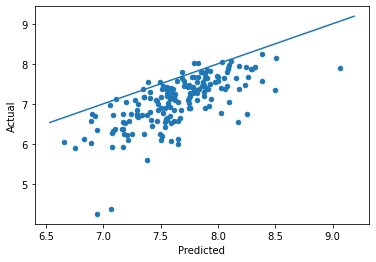

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xbar = np.exp(result1.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result1.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

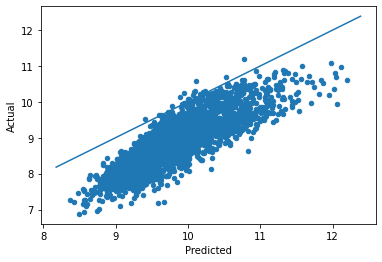

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xbar = np.exp(result4.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result4.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

In [44]:
result1.to_dataset('icrisat.ds')

<xarray.Dataset>
Dimensions:           (j: 3197, i: 9, k: 15, t: 4, m: 1, kp: 15)
Coordinates:
  * j                 (j) int64 10005 10009 10013 10022 ... 379094 379096 379127
  * t                 (t) int64 2010 2012 2015 2018
  * m                 (m) int64 1
  * i                 (i) object 'Bread' ... 'White beans'
  * k                 (k) <U9 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 51+' 'log Hsize'
  * kp                (kp) <U9 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 51+' 'log Hsize'
Data variables: (12/20)
    alpha             object None
    beta              (i) float64 0.2498 0.1508 0.1054 ... 1.201 0.2711 0.1039
    delta             (k, i) float64 -0.003088 0.2643 0.1028 ... 1.308 -0.433
    prices            object None
    characteristics   (k, j, t, m) float64 nan nan nan 0.0 ... nan nan nan 1.386
    loglambdas        (j, t, m) float64 nan nan nan nan nan ... nan nan nan nan
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              (i, t, m) float64 0.08262 0.1346 ... 0.07711 0.08249
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 nan nan nan 0.0 ... nan nan nan 1.386

# Nutritional Data

Read in the consumption data for Nigerian households.

In [45]:
fdc_table = '1ed8FASRCkN9KwTWTvMzKT6UT4jWbSSZQEwZEmXCt8IQ'

fdc_codes = read_sheets(fdc_table,sheet="Sheet1")

consumption = read_sheets(nigeria_consumption,sheet='Consumption')
consumption.insert(loc=2, column='m', value=1)
consumption = consumption.set_index(['t', 'j', 'm'])
consumption = consumption.drop(columns=['Canned'])
consumption

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


u  (Cocoyam, Spinach, etc)  Agricultural eggs  \
t    j      m                                                                  
2010 10001  1          Kilograms                      NaN               0.89   
            1             Litres                      NaN                NaN   
     10002  1          Kilograms                      NaN               0.89   
            1             Litres                      NaN                NaN   
     10003  1          Kilograms                      NaN               0.44   
...                          ...                      ...                ...   
2018 379148 1      2. GRAMS (GR)                      NaN                NaN   
     379151 1  1. KILOGRAMS (KG)                      NaN                NaN   
            1      3. LITRES (L)                      NaN                NaN   
     379154 1  1. KILOGRAMS (KG)                      NaN                NaN   
     379155 1  1. KILOGRAMS (KG)                      NaN                NaN   

               Animal fat  Apples  Avocado pear  Baby milk powder  Bananas  \
t    j      m                                                                
2010 10001  1         NaN     NaN           NaN               NaN     1.30   
            1         NaN     NaN           NaN               NaN      NaN   
     10002  1         NaN     NaN           NaN               NaN     1.30   
            1         NaN     NaN           NaN               NaN      NaN   
     10003  1         NaN     NaN           NaN               NaN     0.35   
...                   ...     ...           ...               ...      ...   
2018 379148 1         NaN     NaN           NaN               NaN      NaN   
     379151 1         NaN     NaN           NaN               NaN      NaN   
            1         NaN     NaN           NaN               NaN      NaN   
     379154 1         NaN     NaN           NaN               NaN      NaN   
     379155 1         NaN     NaN           NaN               NaN      NaN   

                Beef  Beer (local and imported)  ...  Sweet Potatoes   Tea  \
t    j      m                                    ...                         
2010 10001  1    1.0                        NaN  ...             1.5   NaN   
            1    NaN                       2.25  ...             NaN   NaN   
     10002  1    2.0                        NaN  ...             1.8  0.12   
            1    NaN                       9.00  ...             NaN   NaN   
     10003  1    0.3                        NaN  ...             1.4  0.30   
...              ...                        ...  ...             ...   ...   
2018 379148 1  500.0                        NaN  ...             NaN   NaN   
     379151 1    NaN                        NaN  ...             NaN   NaN   
            1    NaN                        NaN  ...             NaN   NaN   
     379154 1    1.0                        NaN  ...             NaN   NaN   
     379155 1    1.0                        NaN  ...             NaN   NaN   

               Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                            
2010 10001  1                  0.42       1.0         NaN          NaN   
            1                   NaN       NaN         NaN          NaN   
     10002  1                  0.56       1.0         NaN          NaN   
            1                   NaN       NaN         NaN          NaN   
     10003  1                  0.21       1.0         NaN          NaN   
...                             ...       ...         ...          ...   
2018 379148 1                   NaN       NaN         NaN          NaN   
     379151 1                   NaN       NaN         NaN          2.0   
            1                   NaN       NaN         NaN          NaN   
     379154 1                   NaN       NaN         NaN          NaN   
     379155 1                   NaN       NaN         NaN          NaN  

### Create a dictionary that will map all of the food units to their equivalent values in hectograms.

Find every unit of measure used in the data in order to convert them to hectograms.

In [46]:
food_units_df = consumption.reset_index()
unique_food_units = np.unique(pd.DataFrame(food_units_df['u'])).tolist()
unique_food_units

['1. KILOGRAMS (KG)',
 '2. GRAMS (G)',
 '2. GRAMS (GR)',
 '3. LITRES (L)',
 '4. CENTILITRES (CL)',
 'Basin: Big/Large (40 kg)',
 'Basin: Medium (25 kg)',
 'Basin: Small (10 kg)',
 'Basket: Big (50 kg)',
 'Basket: Medium (30 kg)',
 'Basket: Small (15 kg)',
 'Bunch of Plantain/FFB: Small (5 kg)',
 'Bunch of plantain/FFB: Big (15 kg)',
 'Bunch of plantain/FFB: Medium (8 kg)',
 'Grams',
 'Kilograms',
 'Litres',
 'Mililitre',
 'Sack/Bag: Medium (50 kg)',
 'Sack/Bag: Small (20 kg)',
 'Tuber of Yam: Big/Large (8 kg)',
 'Tuber of Yam: Medium (5 kg)',
 'Tuber of Yam: Small (3 kg)',
 'Wheel Barrow: Small (60 kg)',
 'centilitre (cl)',
 'grams (g)',
 'kilogram (kg)',
 'litre (l)']

Create the dictionary itself.

For example: food_unit_map_dict['Kilograms'] = 10 because 1 kilogram = 10 hectograms

In [47]:
values = [10, 0.01, 0.01, 10, 0.1, 400, 250, 100, 500, 300, 150, 50, 150, 80, 0.01, 10, 10, 0.01, 500, 200, 80, 50, 30, 600, 0.1, 0.01, 10, 10]
food_unit_map_dict = dict(zip(unique_food_units, values))
food_unit_map_dict


{'1. KILOGRAMS (KG)': 10,
 '2. GRAMS (G)': 0.01,
 '2. GRAMS (GR)': 0.01,
 '3. LITRES (L)': 10,
 '4. CENTILITRES (CL)': 0.1,
 'Basin: Big/Large (40 kg)': 400,
 'Basin: Medium (25 kg)': 250,
 'Basin: Small (10 kg)': 100,
 'Basket: Big (50 kg)': 500,
 'Basket: Medium (30 kg)': 300,
 'Basket: Small (15 kg)': 150,
 'Bunch of Plantain/FFB: Small (5 kg)': 50,
 'Bunch of plantain/FFB: Big (15 kg)': 150,
 'Bunch of plantain/FFB: Medium (8 kg)': 80,
 'Grams': 0.01,
 'Kilograms': 10,
 'Litres': 10,
 'Mililitre': 0.01,
 'Sack/Bag: Medium (50 kg)': 500,
 'Sack/Bag: Small (20 kg)': 200,
 'Tuber of Yam: Big/Large (8 kg)': 80,
 'Tuber of Yam: Medium (5 kg)': 50,
 'Tuber of Yam: Small (3 kg)': 30,
 'Wheel Barrow: Small (60 kg)': 600,
 'centilitre (cl)': 0.1,
 'grams (g)': 0.01,
 'kilogram (kg)': 10,
 'litre (l)': 10}

Convert all of the original units to hectograms in a data frame.

In [48]:
consumption_in_hect = consumption.set_index('u', append=True)

for index in consumption_in_hect.index:
    unit_used = index[3]
    multiplier = food_unit_map_dict[unit_used]
    consumption_in_hect.loc[index] *= multiplier
    
consumption_in_hect = consumption_in_hect.reset_index().set_index(['t', 'j', 'm'])

# Change all the units to hectograms in the data frame
consumption_in_hect['u'] = consumption_in_hect['u'].apply(lambda x: 'Hectograms')
consumption_in_hect

u  (Cocoyam, Spinach, etc)  Agricultural eggs  \
t    j      m                                                           
2010 10001  1  Hectograms                      NaN                8.9   
            1  Hectograms                      NaN                NaN   
     10002  1  Hectograms                      NaN                8.9   
            1  Hectograms                      NaN                NaN   
     10003  1  Hectograms                      NaN                4.4   
...                   ...                      ...                ...   
2018 379148 1  Hectograms                      NaN                NaN   
     379151 1  Hectograms                      NaN                NaN   
            1  Hectograms                      NaN                NaN   
     379154 1  Hectograms                      NaN                NaN   
     379155 1  Hectograms                      NaN                NaN   

               Animal fat  Apples  Avocado pear  Baby milk powder  Bananas  \
t    j      m                                                                
2010 10001  1         NaN     NaN           NaN               NaN     13.0   
            1         NaN     NaN           NaN               NaN      NaN   
     10002  1         NaN     NaN           NaN               NaN     13.0   
            1         NaN     NaN           NaN               NaN      NaN   
     10003  1         NaN     NaN           NaN               NaN      3.5   
...                   ...     ...           ...               ...      ...   
2018 379148 1         NaN     NaN           NaN               NaN      NaN   
     379151 1         NaN     NaN           NaN               NaN      NaN   
            1         NaN     NaN           NaN               NaN      NaN   
     379154 1         NaN     NaN           NaN               NaN      NaN   
     379155 1         NaN     NaN           NaN               NaN      NaN   

               Beef  Beer (local and imported)  ...  Sweet Potatoes  Tea  \
t    j      m                                   ...                        
2010 10001  1  10.0                        NaN  ...            15.0  NaN   
            1   NaN                       22.5  ...             NaN  NaN   
     10002  1  20.0                        NaN  ...            18.0  1.2   
            1   NaN                       90.0  ...             NaN  NaN   
     10003  1   3.0                        NaN  ...            14.0  3.0   
...             ...                        ...  ...             ...  ...   
2018 379148 1   5.0                        NaN  ...             NaN  NaN   
     379151 1   NaN                        NaN  ...             NaN  NaN   
            1   NaN                        NaN  ...             NaN  NaN   
     379154 1  10.0                        NaN  ...             NaN  NaN   
     379155 1  10.0                        NaN  ...             NaN  NaN   

               Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                            
2010 10001  1                   4.2      10.0         NaN          NaN   
            1                   NaN       NaN         NaN          NaN   
     10002  1                   5.6      10.0         NaN          NaN   
            1                   NaN       NaN         NaN          NaN   
     10003  1                   2.1      10.0         NaN          NaN   
...                             ...       ...         ...          ...   
2018 379148 1                   NaN       NaN         NaN          NaN   
     379151 1                   NaN       NaN         NaN         20.0   
            1                   NaN       NaN         NaN          NaN   
     379154 1                   NaN       NaN         NaN          NaN   
     379155 1                   NaN       NaN         NaN          NaN   

               White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m                           

Once all the foods are in the same unit, we can group the rows so that there is only one row per household.

In [49]:
consumption_in_hect = consumption_in_hect.groupby(level=[0, 1]).sum()
consumption_in_hect.insert(loc=2, column='m', value=1)
consumption_in_hect = consumption_in_hect.reset_index().set_index(['t', 'j', 'm'])
consumption_in_hect = consumption_in_hect.replace(0, np.nan)

In [50]:
c_in_h = consumption_in_hect.index.tolist()
food = expend[expend.index.isin(c_in_h)]
food = food.drop(columns=['Total Expenditures', 'People per HH', 'Expenditures per capita', 'Canned'])

In [51]:
food #data frame check 

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10001  1                      NaN              280.0         NaN     NaN   
     10002  1                      NaN              280.0         NaN     NaN   
     10003  1                      NaN              180.0         NaN     NaN   
     10004  1                      NaN              180.0         NaN     NaN   
     10006  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379146 1                      NaN             1100.0         NaN     NaN   
     379148 1                    100.0                NaN         NaN     NaN   
     379151 1                      NaN              900.0         NaN     NaN   
     379154 1                    200.0             1200.0         NaN     NaN   
     379155 1                    100.0              950.0         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas    Beef  \
t    j      m                                                    
2010 10001  1           NaN               NaN    200.0   500.0   
     10002  1           NaN               NaN    180.0  1200.0   
     10003  1           NaN               NaN    100.0   500.0   
     10004  1           NaN               NaN    100.0   500.0   
     10006  1           NaN               NaN    300.0   300.0   
...                     ...               ...      ...     ...   
2018 379146 1           NaN               NaN      NaN     NaN   
     379148 1           NaN               NaN      NaN   700.0   
     379151 1           NaN               NaN    500.0     NaN   
     379154 1           NaN               NaN      NaN  1300.0   
     379155 1           NaN               NaN      NaN  1400.0   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10001  1                      540.0       NaN  ...           150.0   
     10002  1                     2000.0       NaN  ...           200.0   
     10003  1                        NaN       NaN  ...           200.0   
     10004  1                        NaN       NaN  ...             NaN   
     10006  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379146 1                        NaN       NaN  ...             NaN   
     379148 1                        NaN       NaN  ...             NaN   
     379151 1                        NaN       NaN  ...             NaN   
     379154 1                        NaN       NaN  ...             NaN   
     379155 1                        NaN       NaN  ...             NaN   

i                Tea  Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                                   
2010 10001  1    NaN                 150.0     150.0         NaN          NaN   
     10002  1  140.0                 240.0     120.0         NaN          NaN   
     10003  1   60.0                  90.0     100.0         NaN          NaN   
     10004  1   30.0                  60.0     100.0         NaN          NaN   
     10006  1  650.0                   NaN     400.0         NaN          NaN   
...              ...                   ...       ...         ...          ...   
2018 379146 1    NaN                   NaN       NaN       500.0          NaN   
     379148 1    NaN                  60.0     200.0       150.0          NaN   
     379151 1    NaN                 150.0     600.0       600.0        750.0   
     379154 1    NaN                   NaN     100.0       200.0          NaN   
     379155 1    NaN                   NaN     300.0       200.0          NaN   

i              White beans  Wild game meat  Yam flour  Ya

In [52]:
divided = food.div(consumption_in_hect)
prices = divided.mean(axis=0)
prices #prices per hectograms 

i
(Cocoyam, Spinach, etc)     33.748964
Agricultural eggs          121.522371
Animal fat                  85.000000
Apples                     160.000000
Avocado pear                14.849578
                              ...    
Wheat flour                395.163283
White beans                 21.931440
Wild game meat              96.238442
Yam flour                   27.317893
Yam-roots                   32.820847
Length: 123, dtype: float64

In [53]:
pricedf = pd.DataFrame(prices)
pricedf.reset_index().set_index('i')

0
i                                  
(Cocoyam, Spinach, etc)   33.748964
Agricultural eggs        121.522371
Animal fat                85.000000
Apples                   160.000000
Avocado pear              14.849578
...                             ...
Wheat flour              395.163283
White beans               21.931440
Wild game meat            96.238442
Yam flour                 27.317893
Yam-roots                 32.820847

[123 rows x 1 columns]

In [54]:
avghh = hh_char.mean(axis=0)
avghhQ1 = hh_charQ1.drop(columns=['log Hsize']).mean(axis=0)
avghhQ2 = hh_charQ2.drop(columns=['log Hsize']).mean(axis=0)
avghhQ3 = hh_charQ3.drop(columns=['log Hsize']).mean(axis=0)
avghhQ4 = hh_charQ4.drop(columns=['log Hsize']).mean(axis=0)
avghhQ1

k
M 0-3      0.414983
M 4-8      0.694865
M 9-13     0.623527
M 14-18    0.513889
M 19-30    0.553662
M 31-50    0.506103
M 51+      0.394150
F 0-3      0.385732
F 4-8      0.648359
F 9-13     0.552820
F 14-18    0.378367
F 19-30    0.640572
F 31-50    0.757786
F 51+      0.295244
dtype: float64

In [55]:
avghh_df = pd.DataFrame(avghh)
avghhQ1_df = pd.DataFrame(avghhQ1)
avghhQ2_df = pd.DataFrame(avghhQ2)
avghhQ3_df = pd.DataFrame(avghhQ3)
avghhQ3_df = pd.DataFrame(avghhQ4)
avghhQ1_df

0
k                
M 0-3    0.414983
M 4-8    0.694865
M 9-13   0.623527
M 14-18  0.513889
M 19-30  0.553662
M 31-50  0.506103
M 51+    0.394150
F 0-3    0.385732
F 4-8    0.648359
F 9-13   0.552820
F 14-18  0.378367
F 19-30  0.640572
F 31-50  0.757786
F 51+    0.295244

In [56]:
dri_mins_sheet = '1XJRHTnxNJwrUXperIhwrwDp1HcVxPEVoQobYDmjg9Qw'
dri_mins = read_sheets(dri_mins_sheet,sheet='diet_minimums')
dri_mins = dri_mins.reset_index(drop=True).set_index('Nutrition').drop('Source', axis=1)
dri_mins['M 0-3'] = dri_mins['C 1-3']
dri_mins['F 0-3'] = dri_mins['C 1-3']
dri_mins = dri_mins.drop(columns=['C 1-3'])
dri_mins

Key available for students@eep153.iam.gserviceaccount.com.


F 4-8   M 4-8  F 9-13  M 9-13  F 14-18  \
Nutrition                                                                 
Energy                          1200.0  1400.0  1600.0  1800.0   1800.0   
Protein                           19.0    19.0    34.0    34.0     46.0   
Fiber, total dietary              16.8    19.6    22.4    25.2     25.2   
Folate, DFE                      200.0   200.0   300.0   300.0    400.0   
Calcium, Ca                     1000.0  1000.0  1300.0  1300.0   1300.0   
Carbohydrate, by difference      130.0   130.0   130.0   130.0    130.0   
Iron, Fe                          10.0    10.0     8.0     8.0     15.0   
Magnesium, Mg                    130.0   130.0   240.0   240.0    360.0   
Niacin                             8.0     8.0    12.0    12.0     14.0   
Phosphorus, P                    500.0   500.0  1250.0  1250.0   1250.0   
Potassium, K                    3800.0  3800.0  4500.0  4500.0   4700.0   
Riboflavin                         0.6     0.6     0.9     0.9      1.0   
Thiamin                            0.6     0.6     0.9     0.9      1.0   
Vitamin A, RAE                   400.0   400.0   600.0   600.0    700.0   
Vitamin B-12                       1.2     1.2     1.8     1.8      2.4   
Vitamin B-6                        0.6     0.6     1.0     1.0      1.2   
Vitamin C, total ascorbic acid    25.0    25.0    45.0    45.0     65.0   
Vitamin E (alpha-tocopherol)       7.0     7.0    11.0    11.0     15.0   
Vitamin K (phylloquinone)         55.0    55.0    60.0    60.0     75.0   
Zinc, Zn                           5.0     5.0     8.0     8.0      9.0   

                                M 14-18  F 19-30  M 19-30  F 31-50  M 31-50  \
Nutrition                                                                     
Energy                           2200.0   2000.0   2400.0   1800.0   2200.0   
Protein                            52.0     46.0     56.0     46.0     56.0   
Fiber, total dietary               30.8     28.0     33.6     25.2     30.8   
Folate, DFE                       400.0    400.0    400.0    400.0    400.0   
Calcium, Ca                      1300.0   1000.0   1000.0   1000.0   1000.0   
Carbohydrate, by difference       130.0    130.0    130.0    130.0    130.0   
Iron, Fe                           11.0     18.0      8.0     18.0      8.0   
Magnesium, Mg                     410.0    310.0    400.0    320.0    420.0   
Niacin                             16.0     14.0     16.0     14.0     16.0   
Phosphorus, P                    1250.0    700.0    700.0    700.0    700.0   
Potassium, K                     4700.0   4700.0   4700.0   4700.0   4700.0   
Riboflavin                          1.3      1.1      1.3      1.1      1.3   
Thiamin                             1.2      1.1      1.2      1.1      1.2   
Vitamin A, RAE                    900.0    700.0    900.0    700.0    900.0   
Vitamin B-12                        2.4      2.4      2.4      2.4      2.4   
Vitamin B-6                         1.3      1.3      1.3      1.3      1.3   
Vitamin C, total ascorbic acid     75.0     75.0     90.0     75.0     90.0   
Vitamin E (alpha-tocopherol)       15.0     15.0     15.0     15.0     15.0   
Vitamin K (phylloquinone)          75.0     90.0    120.0     90.0    120.0   
Zinc, Zn                           11.0      8.0     11.0      8.0     11.0   

                                 F 51+   M 51+   M 0-3   F 0-3  
Nutrition                                                       
Energy                          1600.0  2000.0  1000.0  1000.0  
Protein                           46.0    56.0    13.0    13.0  
Fiber, total dietary              22.4    28.0    14.0    14.0  
Folate, DFE                      400.0   400.0   150.0   150.0  
Calcium, Ca                     1200.0  1000.0   700.0   700.0  
Carbohydrate, by difference      130.0   130.0   130.0   130.0  
Iron, Fe                           8.0     8.0     7.0     7.0  
Magnesium, Mg                    320.0   420.0    80.0    

In [57]:
dri0,avghh0=dri_mins.align(avghh,axis=1)
hh_dri = dri0.replace('',0)@avghh0

dri0,avghhQ1_0=dri_mins.align(avghhQ1,axis=1)
hh_driQ1 = dri0.replace('',0)@avghhQ1_0

dri0,avghhQ2_0=dri_mins.align(avghhQ2,axis=1)
hh_driQ2 = dri0.replace('',0)@avghhQ2_0

dri0,avghhQ3_0=dri_mins.align(avghhQ3,axis=1)
hh_driQ3 = dri0.replace('',0)@avghhQ3_0

dri0,avghhQ4_0=dri_mins.align(avghhQ4,axis=1)
hh_driQ4 = dri0.replace('',0)@avghhQ4_0

l = hh_dri.index.tolist()

In [58]:
hh_dri_df = pd.DataFrame(hh_dri)
hh_driQ1_df = pd.DataFrame(hh_driQ1)
hh_driQ2_df = pd.DataFrame(hh_driQ2)
hh_driQ3_df = pd.DataFrame(hh_driQ3)
hh_driQ4_df = pd.DataFrame(hh_driQ4)
hh_driQ1_df #nutrients for Quartile 1 check

0
Nutrition                                   
Energy                          12718.097643
Protein                           279.378367
Fiber, total dietary              178.053367
Folate, DFE                      2357.565236
Calcium, Ca                      7799.473906
Carbohydrate, by difference       956.807660
Iron, Fe                           78.940025
Magnesium, Mg                    2003.023990
Niacin                             90.158670
Phosphorus, P                    5828.956229
Potassium, K                    31786.889731
Riboflavin                          7.064478
Thiamin                             6.867698
Vitamin A, RAE                   4704.713805
Vitamin B-12                       14.145391
Vitamin B-6                         7.813215
Vitamin C, total ascorbic acid    419.534933
Vitamin E (alpha-tocopherol)       87.743266
Vitamin K (phylloquinone)         562.292719
Zinc, Zn                           57.128998

In [59]:
nutritional_df = pd.read_csv('my_nutrients.csv').reset_index(drop=True)
nutritional_df[''] = nutritional_df['Unnamed: 0']
nutritional_df = nutritional_df.drop(columns=['Unnamed: 0']).set_index('')
nutritional_df

(Cocoyam, Spinach, etc)  Agricultural eggs  \
                                                                            
Alanine                                            0.0              0.714   
Alcohol, ethyl                                     0.0              0.000   
Amino acids                                        0.0              0.000   
Arginine                                           0.0              0.691   
Ash                                                0.0              0.650   
...                                                ...                ...   
Vitamin K (Menaquinone-4)                          0.0              0.000   
Vitamin K (phylloquinone)                          0.0              0.000   
Vitamins and Other Components                      0.0              0.000   
Water                                              0.0             86.300   
Zinc, Zn                                           0.0              0.000   

                               Animal fat  Apples  Avocado pear  \
                                                                  
Alanine                               0.0     0.0          0.00   
Alcohol, ethyl                        0.0     0.0          0.00   
Amino acids                           0.0     0.0          0.00   
Arginine                              0.0     0.0          0.00   
Ash                                   0.0     0.0          0.00   
...                                   ...     ...           ...   
Vitamin K (Menaquinone-4)             0.0     0.0          0.00   
Vitamin K (phylloquinone)             0.0     0.0         21.00   
Vitamins and Other Components         0.0     0.0          0.00   
Water                                 0.0     0.0         73.23   
Zinc, Zn                              0.0     0.0          0.64   

                               Baby milk powder  Bananas   Beef  \
                                                                  
Alanine                                    0.00     0.00   0.00   
Alcohol, ethyl                             0.00     0.00   0.00   
Amino acids                                0.00     0.00   0.00   
Arginine                                   0.00     0.00   0.00   
Ash                                        0.00     0.00   0.00   
...                                         ...      ...    ...   
Vitamin K (Menaquinone-4)                  0.00     0.00   0.00   
Vitamin K (phylloquinone)                  5.80     0.50   1.70   
Vitamins and Other Components              0.00     0.00   0.00   
Water                                     87.26    74.91  62.58   
Zinc, Zn                                   0.66     0.15   4.23   

                               Beer (local and imported)  Biscuits  ...  Tea  \
                                                                    ...        
Alanine                                             0.00       0.0  ...  0.0   
Alcohol, ethyl                                      3.90       0.0  ...  0.0   
Amino acids                                         0.00       0.0  ...  0.0   
Arginine                                            0.00       0.0  ...  0.0   
Ash                                                 0.00       0.0  ...  0.0   
...                                                  ...       ...  ...  ...   
Vitamin K (Menaquinone-4)                           0.00       0.0  ...  0.0   
Vitamin K (phylloquinone)                           0.00       0.0  ...  0.0   
Vitamins and Other Components                       0.00       0.0  ...  0.0   
Water                                              91.96       0.0  ...  0.0   
Zinc, Zn                                            0.01       0.0  ...  0.0   

                               Tomato puree(canned)  Tomatoes  \
                                                                
Alanine                                       0.052      0.00   
Alcohol, ethyl                                0.0

In [60]:
n = nutritional_df[nutritional_df.index.isin(l)]
fct = n.T
fct

Calcium, Ca  Carbohydrate, by difference  Energy  \
(Cocoyam, Spinach, etc)         94.0                         3.53    24.0   
Agricultural eggs                0.0                         2.36   231.0   
Animal fat                       0.0                         0.00   867.0   
Apples                           8.0                        14.05    54.0   
Avocado pear                    12.0                         8.53   160.0   
...                              ...                          ...     ...   
Wheat flour                      0.0                        70.70   345.0   
White beans                    236.0                         0.00     0.0   
Wild game meat                  12.0                         0.00   510.0   
Yam flour                       20.0                        84.00   267.0   
Yam-roots                       17.0                        27.88   494.0   

                         Fiber, total dietary  Folate, DFE  Iron, Fe  \
(Cocoyam, Spinach, etc)                   1.2          0.0      2.12   
Agricultural eggs                         0.0          0.0      0.00   
Animal fat                                0.0          0.0      0.00   
Apples                                    2.1          0.0      0.15   
Avocado pear                              6.7         81.0      0.55   
...                                       ...          ...       ...   
Wheat flour                               2.6          0.0      0.00   
White beans                               4.3          0.0      4.93   
Wild game meat                            0.0          0.0      0.00   
Yam flour                                 1.0          0.0      0.72   
Yam-roots                                 4.1         23.0      0.54   

                         Magnesium, Mg  Niacin  Phosphorus, P  Potassium, K  \
(Cocoyam, Spinach, etc)            0.0   0.000            0.0           0.0   
Agricultural eggs                  0.0   0.000            0.0           0.0   
Animal fat                         0.0   0.000            0.0           0.0   
Apples                             0.0   0.000            0.0         107.0   
Avocado pear                      29.0   1.738           52.0         485.0   
...                                ...     ...            ...           ...   
Wheat flour                        0.0   0.000            0.0           0.0   
White beans                      182.0   0.000          533.0        1540.0   
Wild game meat                     0.0   4.000          120.0           0.0   
Yam flour                          0.0   0.000            0.0           0.0   
Yam-roots                         21.0   0.552           55.0         816.0   

                         Protein  Riboflavin  Thiamin  Vitamin A, RAE  \
(Cocoyam, Spinach, etc)     2.35       0.000    0.000             0.0   
Agricultural eggs          10.70       0.391    0.000             0.0   
Animal fat                  0.00       0.000    0.000             0.0   
Apples                      0.41       0.000    0.000             0.0   
Avocado pear                2.00       0.130    0.067             7.0   
...                          ...         ...      ...             ...   
Wheat flour                11.80       0.000    0.000             0.0   
White beans                24.50       0.000    0.000             0.0   
Wild game meat             21.51       0.110    0.390             0.0   
Yam flour                   2.00       0.000    0.000             0.0   
Yam-roots                   1.53       0.032    0.112             7.0   

                         Vitamin B-12  Vitamin B-6  \
(Cocoyam, Spinach, etc)           0.0        0.000   
Agricultural eggs                 0.0        0.000   
Animal fat                        0.0        0.000   
Apples                            0.0        0.000   
Avocado pear                      0.0        0.257   
...                               ...          ...   
Wheat flour                    

# Nutrient System/Adequacy

In [61]:
import warnings 

def nutrient_demand(x,p):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        c = r.demands(x,p)

    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

def my_prices(p0,p=prices,i='Bread'):
    p = p.copy()
    p.loc[i] = p0
    return p

def nutrient_adequacy_ratio(x,p,hh_dri=hh_driQ1):
    return nutrient_demand(x,p)/hh_dri

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def graph_bud_log_nut(reference_x, UseNutrients=l):
    X = np.linspace(reference_x/5,reference_x*5,50)

    df = pd.concat({myx:np.log(nutrient_demand(myx,prices))[UseNutrients] for myx in X},axis=1).T
    ax = df.plot()

    ax.set_xlabel('budget')
    ax.set_ylabel('log nutrient')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

def graph_log_p_log_nut(reference_x, USE_GOOD, UseNutrients=l):
    ref_price = prices[USE_GOOD]

    P = np.linspace(0.01,5,20).tolist()

    ndf = pd.DataFrame({p0:np.log(nutrient_demand(reference_x,my_prices(p0,i=USE_GOOD)))[UseNutrients] for p0 in P}).T

    ax = ndf.plot()

    ax.set_xlabel('log price')
    ax.set_ylabel('log nutrient')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
def graph_bud_log_nut_adq(reference_x, UseNutrients=l, x=5, hh_dri=hh_dri):
    X = np.linspace(reference_x/5,reference_x*x,50)

    ndf = pd.concat({x:np.log(nutrient_adequacy_ratio(x,prices,hh_dri))[UseNutrients] for x in X},axis=1).T

    ax = ndf.plot()

    ax.set_xlabel('budget')
    ax.set_ylabel('log nutrient adequacy ratio')
    ax.axhline(0)
    ax.axvline(reference_x)
    ax.axvline(reference_x+20000, color='green')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

def graph_p_log_NAR(reference_x, USE_GOOD, UseNutrients=l, hh_dri=hh_dri):
    Pscale = np.linspace(prices[USE_GOOD]/100, prices[USE_GOOD]*5, 20).tolist()

    log_nar = {s0:np.log(nutrient_adequacy_ratio(reference_x,my_prices(s0,prices,i=USE_GOOD),hh_dri))[UseNutrients] for s0 in Pscale}

    log_nar = pd.DataFrame(log_nar).T

    ax = log_nar.plot(ylabel='log NAR',xlabel='Price')
    

    ax.axhline(0)
    ax.axvline(prices[USE_GOOD])
    ax.axvline(prices[USE_GOOD]/4, color='Green')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)



In [67]:
import cfe

t = 2010
m = 1

r = cfe.result.from_dataset('Nigeria_small.ds',engine='netcdf4')
reference_x = r.get_predicted_expenditures().mean('j').sum('i').sel(t=t,m=m)
reference_xQ1 = result1.get_predicted_expenditures().mean('j').sum('i').sel(t=t,m=m)
reference_xQ2 = result2.get_predicted_expenditures().mean('j').sum('i').sel(t=t,m=m)
reference_xQ3 = result3.get_predicted_expenditures().mean('j').sum('i').sel(t=t,m=m)
reference_xQ4 = result4.get_predicted_expenditures().mean('j').sum('i').sel(t=t,m=m)

median = xbar.quantile(0.5)
mean = xbar.quantile(0.6152)

looking_at = ['Zinc, Zn', 'Iron, Fe', 'Riboflavin', 'Fiber, total dietary']

/opt/conda/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


## All Households

Looking at how nutrinets, price, and household budgets relate overall and in different quatile ranges. The Primary good of interst is Goat meat as it is a commodity that is elastic and provides many esential nutrients to the Nigerian people. 

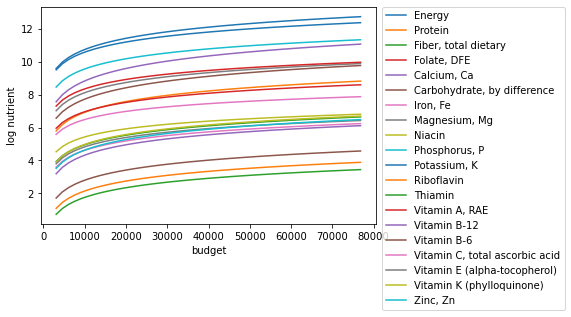

In [68]:
## log nutrients vs budget for all households 
graph_bud_log_nut(reference_x)

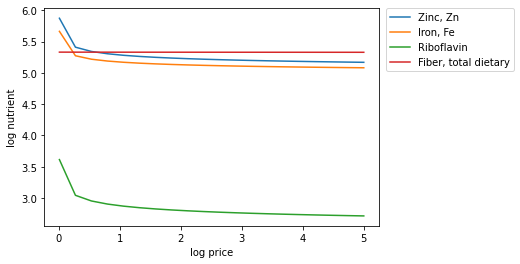

In [69]:
## log nutrients vs log Price for all households 
graph_log_p_log_nut(reference_x, 'Goat', looking_at)

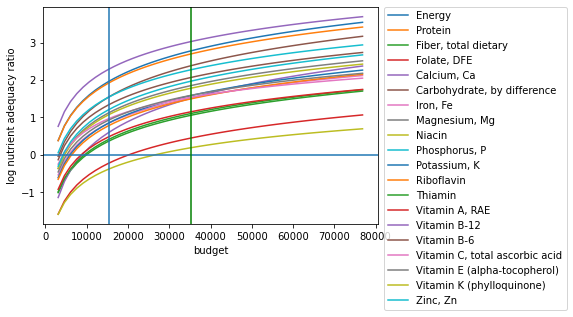

In [70]:
## log nutrient adequacy ratio vs budget for all households 

graph_bud_log_nut_adq(reference_x, hh_dri=hh_dri)

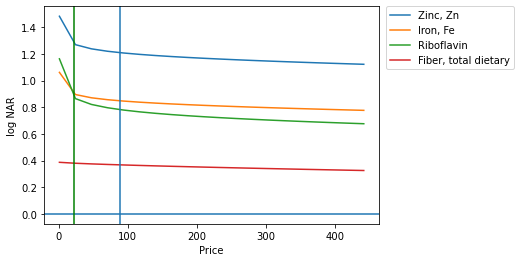

In [71]:
## log nutrient adequacy ratio vs Price for all households 

graph_p_log_NAR(reference_x, 'Goat', looking_at)

# Quartile 1

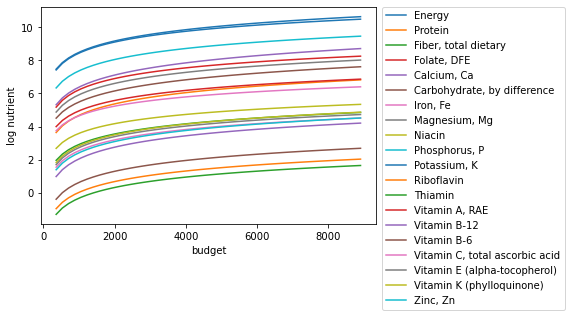

In [72]:
## log nutrients vs budget 

graph_bud_log_nut(reference_xQ1)

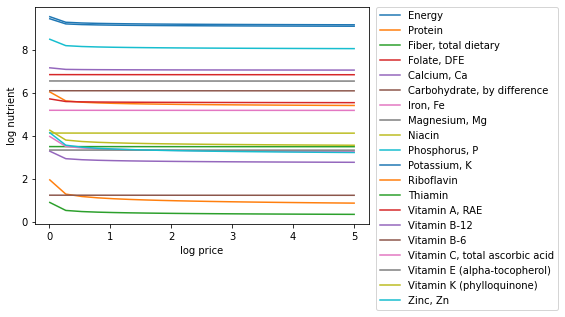

In [73]:
## log nutrients vs log price  

graph_log_p_log_nut(reference_xQ1, 'Goat')

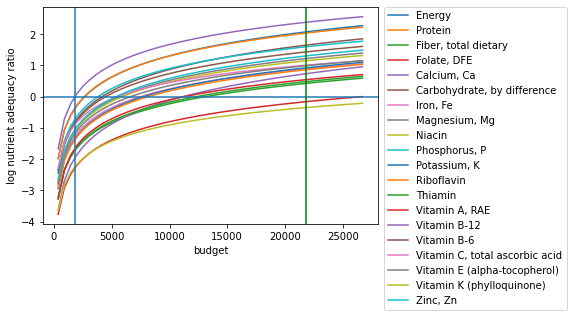

In [74]:
## log nutrient adequacy ratio vs budget 


graph_bud_log_nut_adq(reference_xQ1, x=15, hh_dri=hh_driQ1)

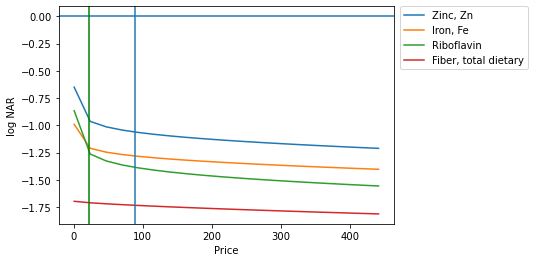

In [75]:
## log nutrient adequacy ratio vs Price 

graph_p_log_NAR(reference_xQ1, 'Goat', looking_at, hh_dri=hh_driQ1)

# Quartile 2

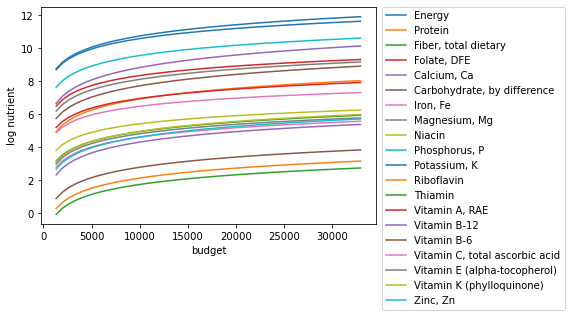

In [76]:
graph_bud_log_nut(reference_xQ2)

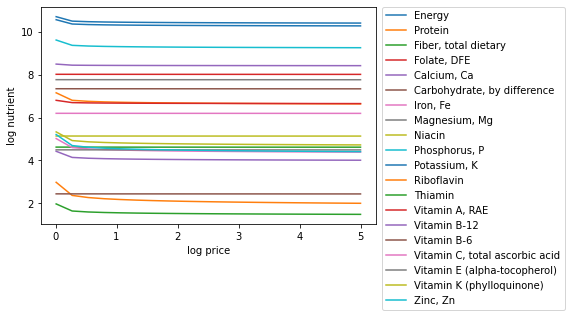

In [77]:
graph_log_p_log_nut(reference_xQ2, 'Goat')

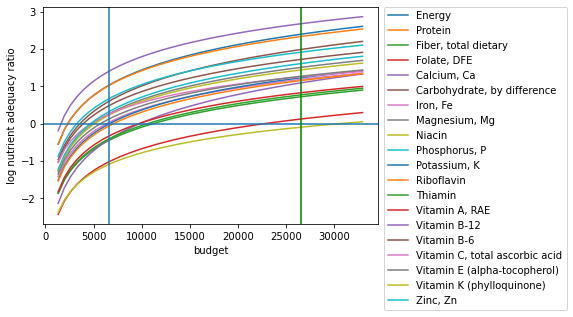

In [78]:
graph_bud_log_nut_adq(reference_xQ2, hh_dri=hh_driQ2)

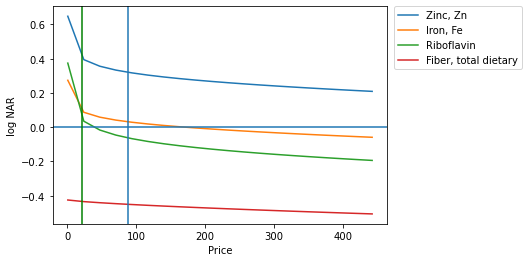

In [79]:
graph_p_log_NAR(reference_xQ2, 'Goat', looking_at, hh_dri=hh_driQ2)

# Quartile 3

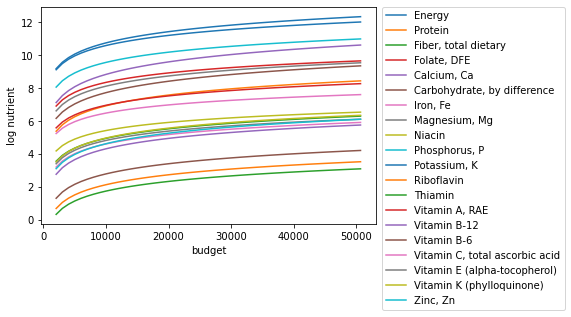

In [80]:
graph_bud_log_nut(reference_xQ3)

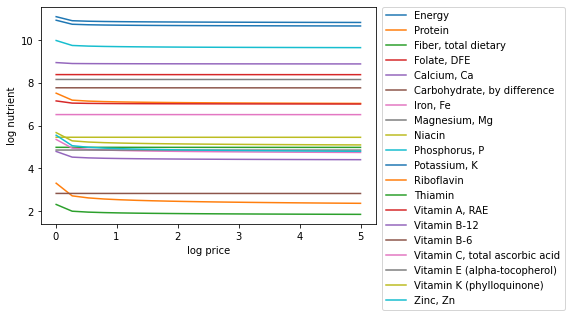

In [81]:
graph_log_p_log_nut(reference_xQ3, 'Goat')

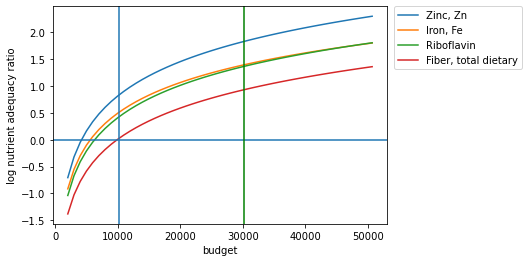

In [82]:
graph_bud_log_nut_adq(reference_xQ3, looking_at)

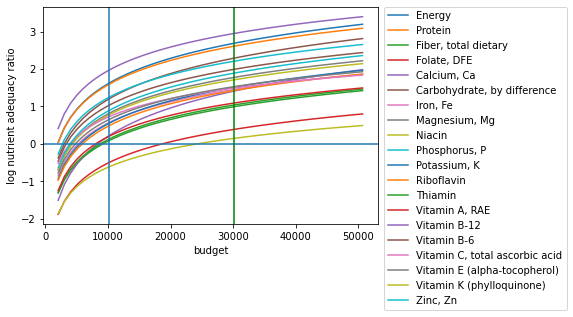

In [83]:
graph_bud_log_nut_adq(reference_xQ3, hh_dri=hh_driQ3)

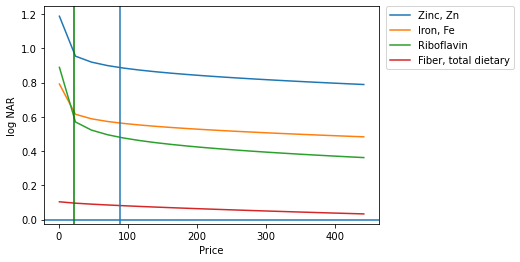

In [84]:
graph_p_log_NAR(reference_xQ3, 'Goat', looking_at, hh_dri=hh_driQ3)

# Quartile 4

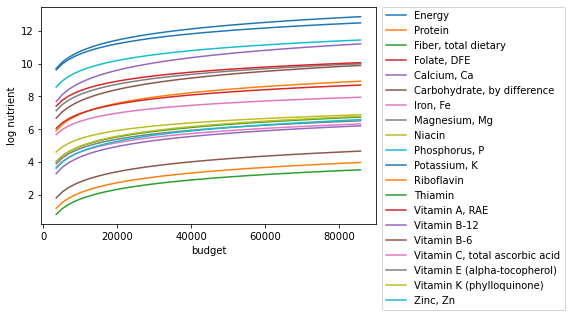

In [85]:
graph_bud_log_nut(reference_xQ4)

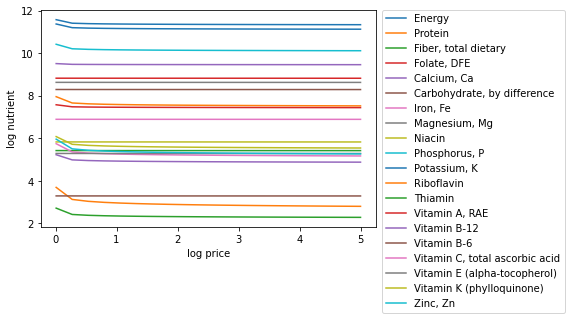

In [86]:
graph_log_p_log_nut(reference_xQ4, 'Goat')

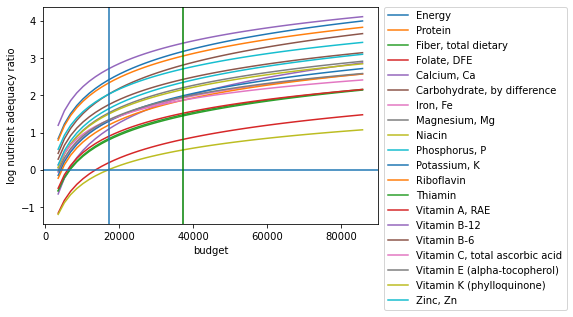

In [87]:
graph_bud_log_nut_adq(reference_xQ4, hh_dri=hh_driQ4)

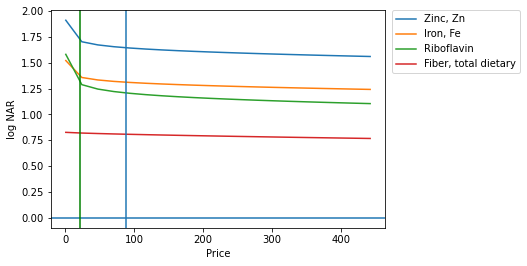

In [88]:
graph_p_log_NAR(reference_xQ4, 'Goat', looking_at, hh_dri=hh_driQ4)

### Find the consumption for the quartiles and convert it to daily consumption

Find the consumption for the households in the upper and lower quartiles from the consumption in hectograms data frame. Then, divide the weekly consumption values by 7 in order to get daily consumptions for these households.


In [111]:
##QUARTILE 1
Q1_consumption = consumption_in_hect[consumption_in_hect.index.isin(Q1.index)]
Q1_consumption_daily = Q1_consumption / 7
Q1_consumption_daily

(Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10013  1                      NaN                NaN         NaN     NaN   
     10022  1                      NaN                NaN         NaN     NaN   
     10063  1                      NaN                NaN         NaN     NaN   
     10066  1                      NaN                NaN         NaN     NaN   
     10069  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379075 1                      NaN                NaN         NaN     NaN   
     379083 1                      NaN                NaN         NaN     NaN   
     379084 1                      NaN                NaN         NaN     NaN   
     379085 1                      NaN                NaN         NaN     NaN   
     379090 1                      NaN                NaN         NaN     NaN   

               Avocado pear  Baby milk powder   Bananas      Beef  \
t    j      m                                                       
2010 10013  1           NaN               NaN  0.500000  0.428571   
     10022  1           NaN               NaN  1.857143       NaN   
     10063  1           NaN               NaN       NaN       NaN   
     10066  1           NaN               NaN       NaN  0.285714   
     10069  1           NaN               NaN       NaN       NaN   
...                     ...               ...       ...       ...   
2018 379075 1           NaN               NaN       NaN       NaN   
     379083 1           NaN               NaN       NaN  0.471429   
     379084 1           NaN               NaN       NaN  1.428571   
     379085 1           NaN               NaN       NaN  0.142857   
     379090 1           NaN               NaN       NaN  0.714286   

               Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10013  1                        NaN       NaN  ...             NaN   
     10022  1                        NaN       NaN  ...             NaN   
     10063  1                        NaN       NaN  ...             NaN   
     10066  1                        NaN       NaN  ...             NaN   
     10069  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379075 1                        NaN       NaN  ...             NaN   
     379083 1                        NaN       NaN  ...             NaN   
     379084 1                        NaN       NaN  ...             NaN   
     379085 1                        NaN       NaN  ...             NaN   
     379090 1                        NaN       NaN  ...             NaN   

                    Tea  Tomato puree(canned)  Tomatoes  Watermelon  \
t    j      m                                                         
2010 10013  1  0.214286                   0.2  1.428571         NaN   
     10022  1       NaN                   0.2  0.714286         NaN   
     10063  1       NaN                   0.1  1.428571         NaN   
     10066  1       NaN                   0.1  1.428571         NaN   
     10069  1       NaN                   NaN  1.428571         NaN   
...                 ...                   ...       ...         ...   
2018 379075 1       NaN                   NaN       NaN         NaN   
     379083 1       NaN                   NaN       NaN         NaN   
     379084 1       NaN                   NaN       NaN         NaN   
     379085 1       NaN                   NaN       NaN         NaN   
     379090 1       NaN                   NaN       NaN         NaN   

               Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m                                                                  
201

In [112]:
##QUARTILE 2

Q2_consumption = consumption_in_hect[consumption_in_hect.index.isin(Q2.index)]
Q2_consumption_daily = Q2_consumption / 7
Q2_consumption_daily

(Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10019  1                      NaN                NaN         NaN     NaN   
     10020  1                      NaN                NaN         NaN     NaN   
     10021  1                      NaN                NaN         NaN     NaN   
     10025  1                      NaN                NaN         NaN     NaN   
     10027  1                 1.428571                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379054 1                      NaN                NaN         NaN     NaN   
     379055 1                      NaN                NaN         NaN     NaN   
     379063 1                      NaN                NaN         NaN     NaN   
     379082 1                      NaN                NaN         NaN     NaN   
     379093 1                      NaN                NaN         NaN     NaN   

               Avocado pear  Baby milk powder   Bananas      Beef  \
t    j      m                                                       
2010 10019  1           NaN               NaN       NaN       NaN   
     10020  1           NaN               NaN       NaN  0.214286   
     10021  1           NaN               NaN  1.857143  1.428571   
     10025  1           NaN               NaN  0.428571  0.214286   
     10027  1           NaN               NaN       NaN       NaN   
...                     ...               ...       ...       ...   
2018 379054 1           NaN               NaN       NaN  1.428571   
     379055 1           NaN               NaN       NaN  1.857143   
     379063 1           NaN               NaN       NaN       NaN   
     379082 1           NaN               NaN       NaN       NaN   
     379093 1           NaN               NaN       NaN  0.714286   

               Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10019  1                        NaN       NaN  ...             NaN   
     10020  1                        NaN       NaN  ...             NaN   
     10021  1                        NaN       NaN  ...             NaN   
     10025  1                        NaN       NaN  ...             NaN   
     10027  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379054 1                        NaN       NaN  ...             NaN   
     379055 1                        NaN       NaN  ...             NaN   
     379063 1                        NaN       NaN  ...             NaN   
     379082 1                        NaN       NaN  ...             NaN   
     379093 1                        NaN       NaN  ...             NaN   

                    Tea  Tomato puree(canned)  Tomatoes  Watermelon  \
t    j      m                                                         
2010 10019  1       NaN                   5.0  1.428571         NaN   
     10020  1  0.214286                   0.2  1.428571         NaN   
     10021  1       NaN                   0.3  1.428571         NaN   
     10025  1       NaN                   0.2  0.714286         NaN   
     10027  1       NaN                   0.2  1.428571         NaN   
...                 ...                   ...       ...         ...   
2018 379054 1       NaN                   NaN       NaN         NaN   
     379055 1       NaN                   NaN       NaN         NaN   
     379063 1       NaN                   NaN       NaN         NaN   
     379082 1       NaN                   NaN       NaN         NaN   
     379093 1       NaN                   NaN       NaN         NaN   

               Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m                                                                  
201

In [113]:
##QUARTILE 3
Q3_consumption = consumption_in_hect[consumption_in_hect.index.isin(Q3.index)]
Q3_consumption_daily = Q3_consumption / 7
Q3_consumption_daily

(Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10003  1                      NaN           0.628571         NaN     NaN   
     10008  1                      NaN           1.271429         NaN     NaN   
     10011  1                      NaN                NaN         NaN     NaN   
     10012  1                      NaN                NaN         NaN     NaN   
     10015  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379081 1                      NaN                NaN         NaN     NaN   
     379089 1                      NaN                NaN         NaN     NaN   
     379123 1                      NaN                NaN         NaN     NaN   
     379143 1                      NaN                NaN         NaN     NaN   
     379155 1                      NaN                NaN         NaN     NaN   

               Avocado pear  Baby milk powder   Bananas      Beef  \
t    j      m                                                       
2010 10003  1           NaN               NaN  0.500000  0.428571   
     10008  1      1.285714               NaN  2.214286       NaN   
     10011  1           NaN               NaN       NaN  1.428571   
     10012  1           NaN          0.714286       NaN  1.428571   
     10015  1           NaN               NaN       NaN       NaN   
...                     ...               ...       ...       ...   
2018 379081 1           NaN               NaN       NaN  1.428571   
     379089 1           NaN               NaN       NaN  2.142857   
     379123 1           NaN               NaN       NaN  1.428571   
     379143 1           NaN               NaN       NaN       NaN   
     379155 1           NaN               NaN       NaN  1.428571   

               Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10003  1                        NaN       NaN  ...             2.0   
     10008  1                        NaN       NaN  ...             NaN   
     10011  1                        NaN       NaN  ...             NaN   
     10012  1                        NaN       NaN  ...             NaN   
     10015  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379081 1                        NaN       NaN  ...             NaN   
     379089 1                        NaN       NaN  ...             NaN   
     379123 1                        NaN       NaN  ...             NaN   
     379143 1                        NaN       NaN  ...             NaN   
     379155 1                        NaN       NaN  ...             NaN   

                    Tea  Tomato puree(canned)  Tomatoes  Watermelon  \
t    j      m                                                         
2010 10003  1  0.428571                   0.3  1.428571         NaN   
     10008  1       NaN                   5.0  1.428571         NaN   
     10011  1       NaN                   0.2  1.428571         NaN   
     10012  1       NaN                   0.4  1.428571         NaN   
     10015  1       NaN                   0.1  0.714286         NaN   
...                 ...                   ...       ...         ...   
2018 379081 1       NaN                   NaN       NaN         NaN   
     379089 1       NaN                   NaN       NaN         NaN   
     379123 1       NaN                   NaN       NaN         NaN   
     379143 1       NaN                   NaN       NaN         NaN   
     379155 1       NaN                   NaN       NaN         NaN   

               Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m                                                                  
201

In [114]:
##QUARTILE 4
Q4_consumption = consumption_in_hect[consumption_in_hect.index.isin(Q4.index)]
Q4_consumption_daily = Q4_consumption / 7
Q4_consumption_daily

(Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10001  1                      NaN           1.271429         NaN     NaN   
     10002  1                      NaN           1.271429         NaN     NaN   
     10004  1                      NaN           0.628571         NaN     NaN   
     10006  1                      NaN                NaN         NaN     NaN   
     10009  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379144 1                      NaN                NaN         NaN     NaN   
     379146 1                      NaN                NaN         NaN     NaN   
     379148 1                      NaN                NaN         NaN     NaN   
     379151 1                      NaN                NaN         NaN     NaN   
     379154 1                      NaN                NaN         NaN     NaN   

               Avocado pear  Baby milk powder   Bananas      Beef  \
t    j      m                                                       
2010 10001  1           NaN               NaN  1.857143  1.428571   
     10002  1           NaN               NaN  1.857143  2.857143   
     10004  1           NaN               NaN  0.500000  0.428571   
     10006  1           NaN               NaN  1.500000  0.857143   
     10009  1           NaN          0.642857  0.500000  0.428571   
...                     ...               ...       ...       ...   
2018 379144 1           NaN               NaN       NaN       NaN   
     379146 1           NaN               NaN       NaN       NaN   
     379148 1           NaN               NaN       NaN  0.714286   
     379151 1           NaN               NaN       NaN       NaN   
     379154 1           NaN               NaN       NaN  1.428571   

               Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10001  1                   3.214286       NaN  ...        2.142857   
     10002  1                  12.857143       NaN  ...        2.571429   
     10004  1                        NaN       NaN  ...             NaN   
     10006  1                        NaN       NaN  ...             NaN   
     10009  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379144 1                        NaN       NaN  ...             NaN   
     379146 1                        NaN       NaN  ...             NaN   
     379148 1                        NaN       NaN  ...             NaN   
     379151 1                        NaN       NaN  ...             NaN   
     379154 1                        NaN       NaN  ...             NaN   

                    Tea  Tomato puree(canned)  Tomatoes  Watermelon  \
t    j      m                                                         
2010 10001  1       NaN                   0.6  1.428571         NaN   
     10002  1  0.171429                   0.8  1.428571         NaN   
     10004  1  0.214286                   0.2  1.428571         NaN   
     10006  1  6.714286                   NaN  5.714286         NaN   
     10009  1  0.428571                   0.4  2.857143         NaN   
...                 ...                   ...       ...         ...   
2018 379144 1       NaN                   NaN       NaN         NaN   
     379146 1       NaN                   NaN       NaN         NaN   
     379148 1       NaN                   NaN       NaN         NaN   
     379151 1       NaN                   NaN       NaN         NaN   
     379154 1       NaN                   NaN       NaN         NaN   

               Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m                                                                  
201

Set Up for Change in Budget Because of the Policy

In [116]:
# A quantile of 0.5 is the median.  Play with quantile value, or just assign.
xbar = r.get_predicted_expenditures().sel(t=2010,m=1).sum('i')
xbarQ1 = result1.get_predicted_expenditures().sel(t=2010,m=1).sum('i')
xbarQ2 = result2.get_predicted_expenditures().sel(t=2010,m=1).sum('i')
xbarQ3 = result3.get_predicted_expenditures().sel(t=2010,m=1).sum('i')
xbarQ4 = result4.get_predicted_expenditures().sel(t=2010,m=1).sum('i')

# Drop households with /no/ predicted expenditures
xbar = xbar.where(xbar>0)
xbarQ1 = xbarQ1.where(xbarQ1>0)
xbarQ2 = xbarQ2.where(xbarQ2>0)
xbarQ3 = xbarQ3.where(xbarQ3>0)
xbarQ4 = xbarQ4.where(xbarQ4>0)

x0 = xbar.quantile(0.10,'j') # Budget

# Range of budgets to explore
X = np.linspace(x0/10,x0*5,50)

/opt/conda/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Set Up for Change in Price Because of the Policy

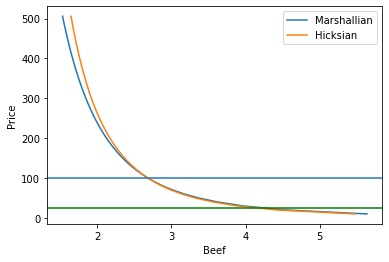

In [93]:
import matplotlib.pyplot as plt

USE_GOOD = 'Beef'

ref_price = prices[USE_GOOD]
P = np.linspace(ref_price/10,ref_price*5,50)

U0 = r.indirect_utility(x0,prices)

plt.plot([r.demands(x0,my_prices(p0,i=USE_GOOD))[USE_GOOD] for p0 in P],P)
plt.plot([r.demands(U0,my_prices(p0,i=USE_GOOD),type="Hicksian")[USE_GOOD] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(USE_GOOD)
plt.axhline(ref_price)
plt.axhline(ref_price/4, color='green')
plt.legend(("Marshallian","Hicksian"))

In [ ]:
def compensating_variation(U0,p0,p1):
    x0 = r.expenditure(U0,p0)
    x1 = r.expenditure(U0,p1)

    return x1-x0

def revenue(U0,p0,p1,type='Marshallian'):
    """(Un)Compensated revenue from taxes changing vector of prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    
    dp = p1 - p0 # Change in prices

    c = r.demands(U0,p1,type=type)

    dp,c = dp.align(c,join='inner')

    return dp.T@c


def deadweight_loss(U0,p0,p1):
    """
    Deadweight loss of tax/subsidy scheme creating wedge in prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    cv = compensating_variation(U0,p0,p1)

    return cv - revenue(U0,p0,p1,type='Hicksian') 
    
    
def compensated_nutrient_demand(U,p,z=None):
    c = r.demands(U,p,z=z,type='Hicksian')
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    return N

def compensated_nutrient_adequacy_ratio(U,p):
    return (compensated_nutrient_demand(U,p)/hh_driQ1_df.T).squeeze()

## Changing prices 

In [96]:
p_decrease = prices * 0.25

No handles with labels found to put in legend.


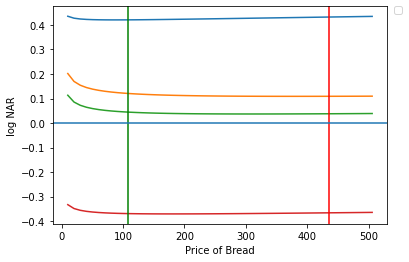

In [97]:
my_i = 'Bread' # A good that was common amongst all quartiles 

fig,ax2 = plt.subplots()
ax2.set_ylabel('log NAR')
ax2.plot(P,[np.log(compensated_nutrient_adequacy_ratio(U0,my_prices(p0,i=my_i))[looking_at]) for p0 in P])
ax2.legend(l)
ax2.axvline(prices.loc[my_i], color='red')
ax2.axvline(p_decrease[my_i], color='green')
ax2.axhline(0)
ax2.set_xlabel("Price of %s" % my_i)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

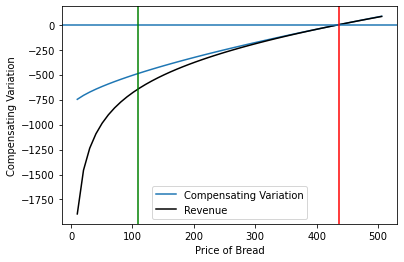

In [98]:
fig, ax1 = plt.subplots()

ax1.plot(P,[compensating_variation(U0,prices,my_prices(p0,i=my_i)) for p0 in P])
ax1.set_xlabel("Price of %s" % my_i)
ax1.set_ylabel("Compensating Variation")

ax1.plot(P,[revenue(U0,prices,my_prices(p0,i=my_i),type='Hicksian') for p0 in P],'k')
ax1.legend(('Compensating Variation','Revenue'))
ax1.axhline(0)
ax1.axvline(prices.loc[my_i], color='red')
ax1.axvline(p_decrease[my_i], color='green')

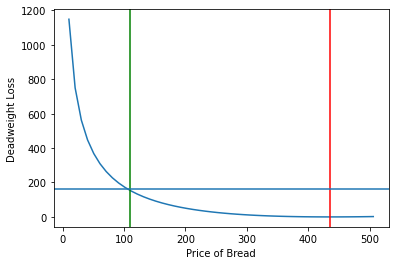

In [99]:
fig, ax1 = plt.subplots()

ax1.plot(P,[deadweight_loss(U0,prices,my_prices(p0,i=my_i)) for p0 in P])
ax1.set_xlabel("Price of %s" % my_i)
ax1.set_ylabel("Deadweight Loss")
ax1.axvline(prices.loc[my_i], color='red')
ax1.axvline(p_decrease[my_i], color='green')
ax1.axhline(160)

## Changing budget

In [100]:
low = expend.reset_index()['Expenditures per capita'].quantile(0)
twentyfive = round(expend.reset_index()['Expenditures per capita'].quantile(0.25), 2)
fifty = round(expend.reset_index()['Expenditures per capita'].quantile(0.50), 2)
seventyfive = round(expend.reset_index()['Expenditures per capita'].quantile(0.75), 2)
high = expend.reset_index()['Expenditures per capita'].quantile(1)
print('Q1 boundaries:',[low, twentyfive]) 
print('Q2 boundaries:',[twentyfive, fifty])
print('Q3 boundaries:',[fifty, seventyfive])
print('Q4 boundaries:',[seventyfive, high])

Q1 boundaries: [0.0, 394.17]
Q2 boundaries: [394.17, 728.89]
Q3 boundaries: [728.89, 1320.0]
Q4 boundaries: [1320.0, 29820.0]


## Consumption Dataframe

The cell below outputs a dataframe describing the different foods that each quartile of households consumed, what % of the households consumed each food, and out of those that consumed the food in each row, how much they consumed on average (in hectograms).

In [122]:
pd.DataFrame(Q4_consumption_daily.fillna(False).astype(bool).sum(axis=0))

0
(Cocoyam, Spinach, etc)   157
Agricultural eggs         235
Animal fat                  1
Apples                      2
Avocado pear               48
...                       ...
Wheat flour               177
White beans               633
Wild game meat             39
Yam flour                 177
Yam-roots                1335

[123 rows x 1 columns]

In [139]:
index = all_summed_nutrients.index.tolist()

summed_foodsQ1 = pd.DataFrame(Q1_consumption_daily.fillna(False).astype(bool).sum(axis=0))
summed_foodsQ1['Q1 (# HH Ate)'] = summed_foodsQ1[0]
summed_foodsQ1 = summed_foodsQ1.drop(columns=0)
summed_foodsQ1['Q1 (% Ate)'] = summed_foodsQ1['Q1 (# HH Ate)'] / len(Q1_consumption_daily) * 100
summed_foodsQ1['Q1 (Average Consumption)'] = Q1_consumption_daily.replace(0, np.nan).mean(axis=0)

summed_foodsQ4 = pd.DataFrame(Q4_consumption_daily.fillna(False).astype(bool).sum(axis=0))
summed_foodsQ4['Q4 (# HH Ate)'] = summed_foodsQ4[0]
summed_foodsQ4 = summed_foodsQ4.drop(columns=0)
summed_foodsQ4['Q4 (% Ate)'] = summed_foodsQ4['Q4 (# HH Ate)'] / len(Q4_consumption_daily) * 100
summed_foodsQ4['Q4 (Average Consumption)'] = Q4_consumption_daily.replace(0, np.nan).mean(axis=0)

summed_foodsQ2 = pd.DataFrame(Q2_consumption_daily.fillna(False).astype(bool).sum(axis=0))
summed_foodsQ2['Q2 (# HH Ate)'] = summed_foodsQ2[0]
summed_foodsQ2 = summed_foodsQ2.drop(columns=0)
summed_foodsQ2['Q2 (% Ate)'] = summed_foodsQ2['Q2 (# HH Ate)'] / len(Q2_consumption_daily) * 100
summed_foodsQ2['Q2 (Average Consumption)'] = Q2_consumption_daily.replace(0, np.nan).mean(axis=0)

summed_foodsQ3 = pd.DataFrame(Q3_consumption_daily.fillna(False).astype(bool).sum(axis=0))
summed_foodsQ3['Q3 (# HH Ate)'] = summed_foodsQ3[0]
summed_foodsQ3 = summed_foodsQ3.drop(columns=0)
summed_foodsQ3['Q3 (% Ate)'] = summed_foodsQ3['Q3 (# HH Ate)'] / len(Q3_consumption_daily) * 100
summed_foodsQ3['Q3 (Average Consumption)'] = Q3_consumption_daily.replace(0, np.nan).mean(axis=0)


all_summed_nutrients = pd.concat([summed_foodsQ1, summed_foodsQ2, summed_foodsQ3, summed_foodsQ4], axis=1)
all_summed_nutrients.sort_values(['Q4 (% Ate)'], axis=0, ascending=False)

all_summed_nutrients['index']= index

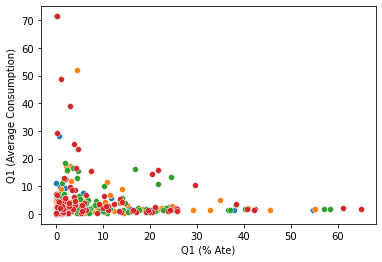

In [140]:
import seaborn as sns
scatter1 = sns.scatterplot(data=all_summed_nutrients, x="Q1 (% Ate)", y="Q1 (Average Consumption)")
scatter2 = sns.scatterplot(data=all_summed_nutrients, x="Q2 (% Ate)", y="Q2 (Average Consumption)")
scatter3 = sns.scatterplot(data=all_summed_nutrients, x="Q3 (% Ate)", y="Q3 (Average Consumption)")
scatter4 = sns.scatterplot(data=all_summed_nutrients, x="Q4 (% Ate)", y="Q4 (Average Consumption)")

In [141]:
all_summed_nutrients.to_csv(r'QuartileConsumption.csv')


Sort the individual dataframes in descending order to see which of the nutrient minimums are satisfied most often in the upper quartile versus the lower quartile.



In [142]:
asn_zinc = all_summed_nutrients[all_summed_nutrients['index'].str.contains("Goat|Coffee|Beef|Brown beans|Canned beef|White beans|Seafood|Mutton|Groundnuts|Other domestic poultry")]
asn_fiber = all_summed_nutrients[all_summed_nutrients['index'].str.contains("Pepper|Fresh pepper|Dry pepper|Okra-dried|Pawpaw|Groundnuts|Kola nut|Maize flour|Guinea Corn")]
asn_iron = all_summed_nutrients[all_summed_nutrients['index'].str.contains("Pepper|Fresh pepper|Dry pepper|White beans|Brown beans|Other eggs|Other nuts|Kola nut|Snails|Guinea Corn|Bread")]
asn_ribo = all_summed_nutrients[all_summed_nutrients['index'].str.contains("Goat|tinned|domestic poultry|Bread|Fish-Dried|Chicken|Other eggs|Agricultural|Maize flour|Duck|Mutton")]

In [143]:
asn_fiber #check

Q1 (# HH Ate)  Q1 (% Ate)  Q1 (Average Consumption)  \
Dry pepper                        192    4.956118                  0.291979   
Fresh pepper                      351    9.060403                  0.647843   
Groundnuts                         76    1.961797                  1.917810   
Groundnuts (shelled)               48    1.239029                  0.576190   
Groundnuts (unshelled)              6    0.154879                  0.578571   
Guinea Corn/Sorghum                78    2.013423                 12.535256   
Kola nut                            0    0.000000                       NaN   
Maize flour                        32    0.826020                  3.557143   
Okra-dried                        343    8.853898                  2.268884   
Pawpaw                              0    0.000000                       NaN   
Pepper                            618   15.952504                  1.373853   

                        Q2 (# HH Ate)  Q2 (% Ate)  Q2 (Average Consumption)  \
Dry pepper                        177    4.195307                  0.388630   
Fresh pepper                      588   13.936952                  0.829220   
Groundnuts                        134    3.176108                  2.689925   
Groundnuts (shelled)               41    0.971794                  0.330575   
Groundnuts (unshelled)             13    0.308130                  0.474725   
Guinea Corn/Sorghum               125    2.962787                 17.368800   
Kola nut                            1    0.023702                  0.071429   
Maize flour                        59    1.398436                  4.187094   
Okra-dried                        373    8.840958                  2.174694   
Pawpaw                              0    0.000000                       NaN   
Pepper                            771   18.274473                  1.655299   

                        Q3 (# HH Ate)  Q3 (% Ate)  Q3 (Average Consumption)  \
Dry pepper                        199    4.514519                  0.312818   
Fresh pepper                      673   15.267695                  0.897306   
Groundnuts                        119    2.699637                  2.123950   
Groundnuts (shelled)               63    1.429220                  0.341701   
Groundnuts (unshelled)             22    0.499093                  0.737662   
Guinea Corn/Sorghum               203    4.605263                 15.401689   
Kola nut                            0    0.000000                       NaN   
Maize flour                        57    1.293103                 11.167168   
Okra-dried                        308    6.987296                  1.079443   
Pawpaw                              0    0.000000                       NaN   
Pepper                            845   19.169691                  1.659142   

                        Q4 (# HH Ate)  Q4 (% Ate)  Q4 (Average Consumption)  \
Dry pepper                        244    5.419813                  0.331070   
Fresh pepper                      766   17.014660                  0.745864   
Groundnuts                        131    2.909818                  2.440731   
Groundnuts (shelled)              114    2.532208                  0.383559   
Groundnuts (unshelled)             22    0.488672                  0.490260   
Guinea Corn/Sorghum               169    3.753887                 25.358157   
Kola nut                            1    0.022212                  0.285714   
Maize flour                        74    1.643714                 12.844054   
Okra-dried                        246    5.464238                  1.153084   
Pawpaw                              5    0.111062                  2.200000   
Pepper                            880   19.546868                  1.322935   

                                         index  
Dry pepper                          Dry pepper  
Fresh pepper                      Fresh pepper  
Groundnuts                          Groundnuts  
Groundnuts (shelled)      Ground

(0.0, 20.0)

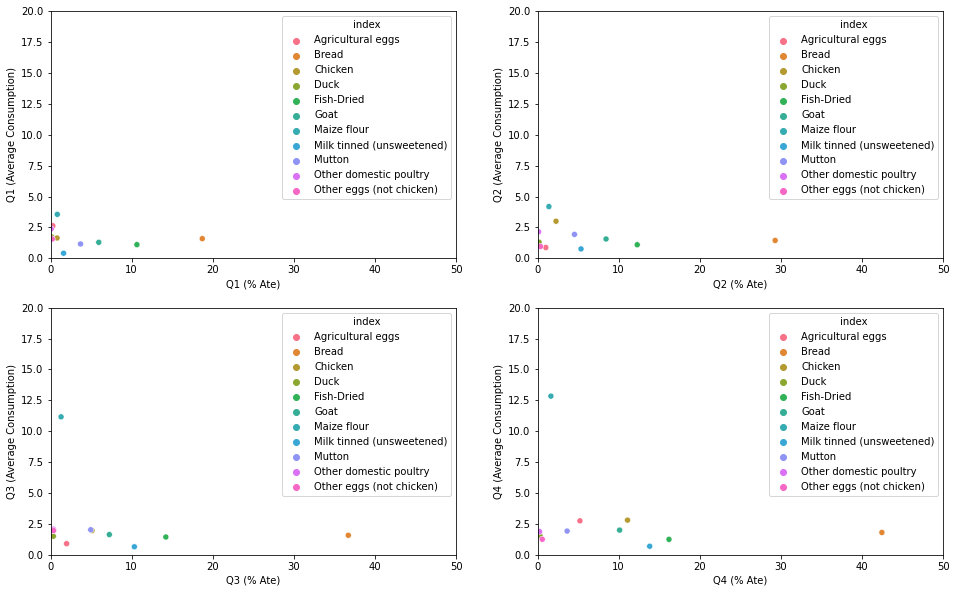

In [144]:
#Riboflavin Top 11
fig, ([ax1,ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=(16,10))
scatter1 = sns.scatterplot(ax = ax1, data=asn_ribo, x="Q1 (% Ate)", y="Q1 (Average Consumption)", hue = 'index')
ax1.set_xlim(0,50)
ax1.set_ylim(0,20)
ax2.set_xlim(0,50)
ax2.set_ylim(0,20)
ax3.set_xlim(0,50)
ax3.set_ylim(0,20)
scatter2 = sns.scatterplot(ax = ax2, data=asn_ribo, x="Q2 (% Ate)", y="Q2 (Average Consumption)", hue = 'index')
scatter3 = sns.scatterplot(ax = ax3, data=asn_ribo, x="Q3 (% Ate)", y="Q3 (Average Consumption)", hue = 'index')
scatter4 = sns.scatterplot(ax = ax4, data=asn_ribo, x="Q4 (% Ate)", y="Q4 (Average Consumption)", hue = 'index')
ax4.set_xlim(0,50)
ax4.set_ylim(0,20)

(0.0, 20.0)

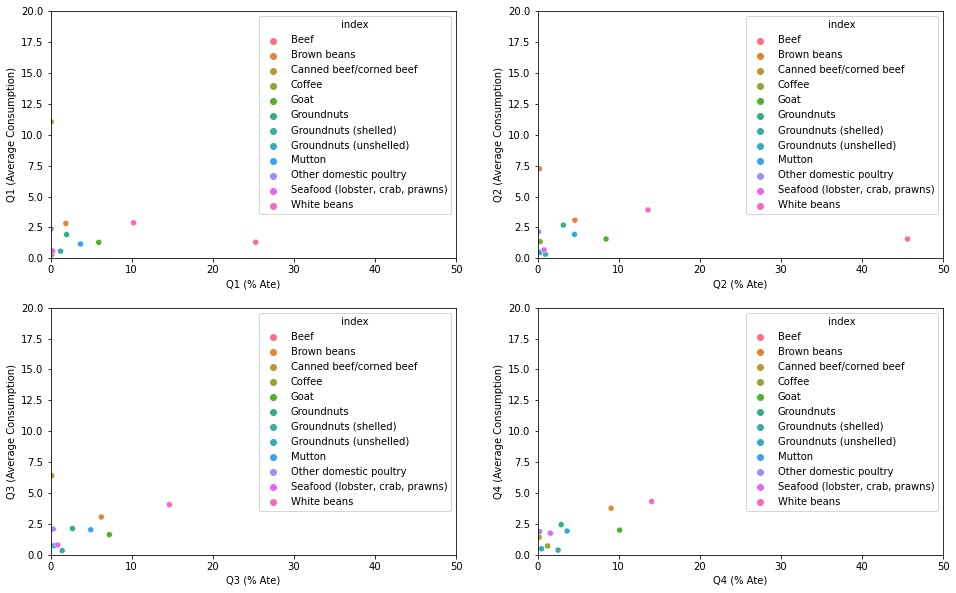

In [145]:
#Zinc Top 12
fig, ([ax1,ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=(16,10))
scatter1 = sns.scatterplot(ax = ax1, data=asn_zinc, x="Q1 (% Ate)", y="Q1 (Average Consumption)", hue = 'index')
ax1.set_xlim(0,50)
ax1.set_ylim(0,20)
ax2.set_xlim(0,50)
ax2.set_ylim(0,20)
ax3.set_xlim(0,50)
ax3.set_ylim(0,20)
scatter2 = sns.scatterplot(ax = ax2, data=asn_zinc, x="Q2 (% Ate)", y="Q2 (Average Consumption)", hue = 'index')
scatter3 = sns.scatterplot(ax = ax3, data=asn_zinc, x="Q3 (% Ate)", y="Q3 (Average Consumption)", hue = 'index')
scatter4 = sns.scatterplot(ax = ax4, data=asn_zinc, x="Q4 (% Ate)", y="Q4 (Average Consumption)", hue = 'index')
ax4.set_xlim(0,50)
ax4.set_ylim(0,20)

(0.0, 20.0)

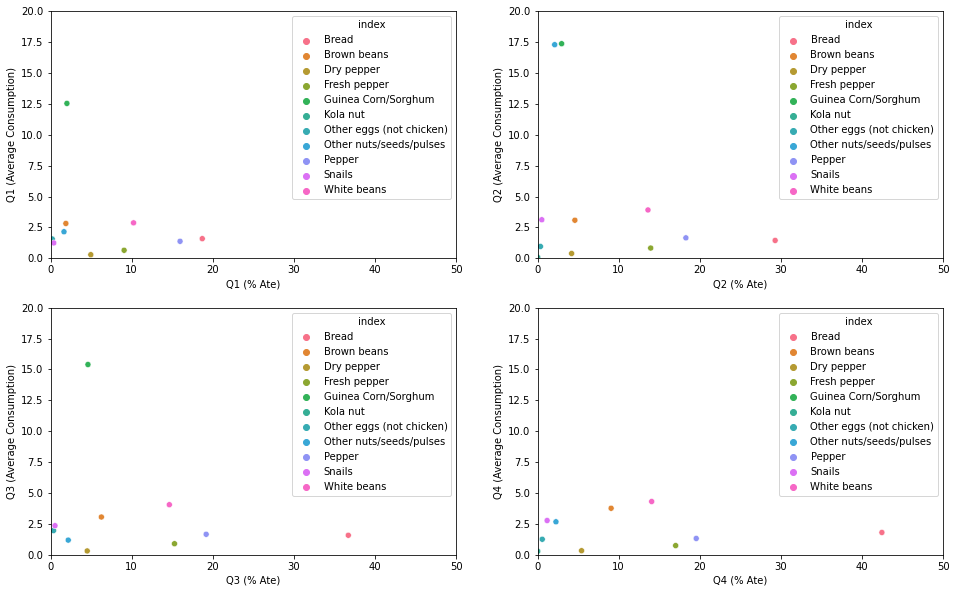

In [146]:
#Iron Top 11
fig, ([ax1,ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=(16,10))
scatter1 = sns.scatterplot(ax = ax1, data=asn_iron, x="Q1 (% Ate)", y="Q1 (Average Consumption)", hue = 'index')
ax1.set_xlim(0,50)
ax1.set_ylim(0,20)
ax2.set_xlim(0,50)
ax2.set_ylim(0,20)
ax3.set_xlim(0,50)
ax3.set_ylim(0,20)
scatter2 = sns.scatterplot(ax = ax2, data=asn_iron, x="Q2 (% Ate)", y="Q2 (Average Consumption)", hue = 'index')
scatter3 = sns.scatterplot(ax = ax3, data=asn_iron, x="Q3 (% Ate)", y="Q3 (Average Consumption)", hue = 'index')
scatter4 = sns.scatterplot(ax = ax4, data=asn_iron, x="Q4 (% Ate)", y="Q4 (Average Consumption)", hue = 'index')
ax4.set_xlim(0,50)
ax4.set_ylim(0,20)

(0.0, 20.0)

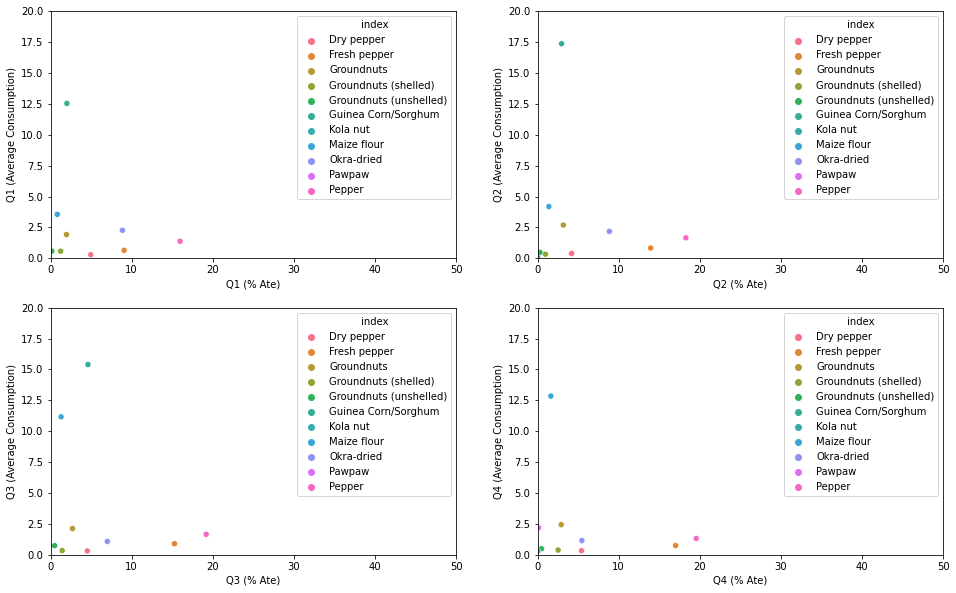

In [147]:
#Fiber Top 11
fig, ([ax1,ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=(16,10))
scatter1 = sns.scatterplot(ax = ax1, data=asn_fiber, x="Q1 (% Ate)", y="Q1 (Average Consumption)", hue = 'index')
ax1.set_xlim(0,50)
ax1.set_ylim(0,20)
ax2.set_xlim(0,50)
ax2.set_ylim(0,20)
ax3.set_xlim(0,50)
ax3.set_ylim(0,20)
scatter2 = sns.scatterplot(ax = ax2, data=asn_fiber, x="Q2 (% Ate)", y="Q2 (Average Consumption)", hue = 'index')
scatter3 = sns.scatterplot(ax = ax3, data=asn_fiber, x="Q3 (% Ate)", y="Q3 (Average Consumption)", hue = 'index')
scatter4 = sns.scatterplot(ax = ax4, data=asn_fiber, x="Q4 (% Ate)", y="Q4 (Average Consumption)", hue = 'index')
ax4.set_xlim(0,50)
ax4.set_ylim(0,20)

<AxesSubplot:xlabel='Q1 (% Ate)', ylabel='Q1 (Average Consumption)'>

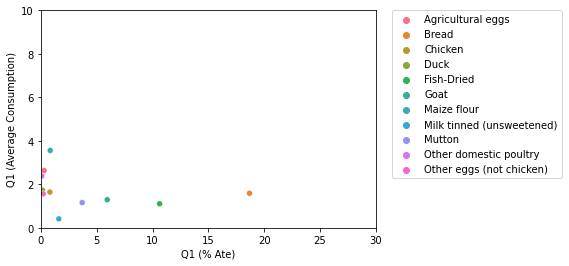

In [148]:
#Scatter plot of al goods relating to average consumption of Q1
scatter1 = sns.scatterplot(data=asn_ribo, x="Q1 (% Ate)", y="Q1 (Average Consumption)", hue = 'index')
plt.ylim(0, 10)
plt.xlim(0, 30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
scatter1

<AxesSubplot:xlabel='Q2 (% Ate)', ylabel='Q2 (Average Consumption)'>

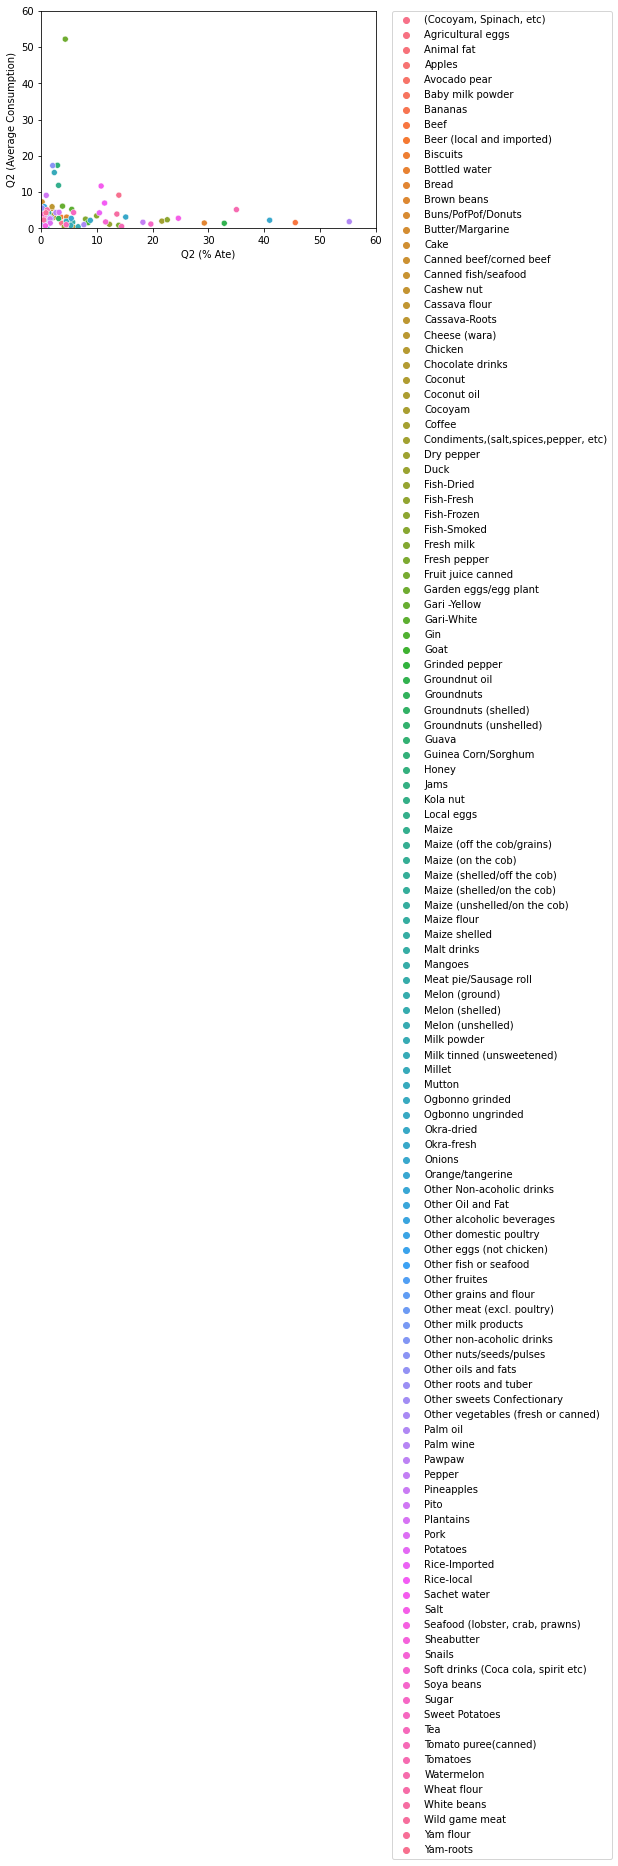

In [149]:
#Scatter plot of al goods relating to average consumption of Q2
scatter2 = sns.scatterplot(data=all_summed_nutrients, x="Q2 (% Ate)", y="Q2 (Average Consumption)", hue = 'index')
plt.ylim(0, 60)
plt.xlim(0, 60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
scatter2

<AxesSubplot:xlabel='Q3 (% Ate)', ylabel='Q3 (Average Consumption)'>

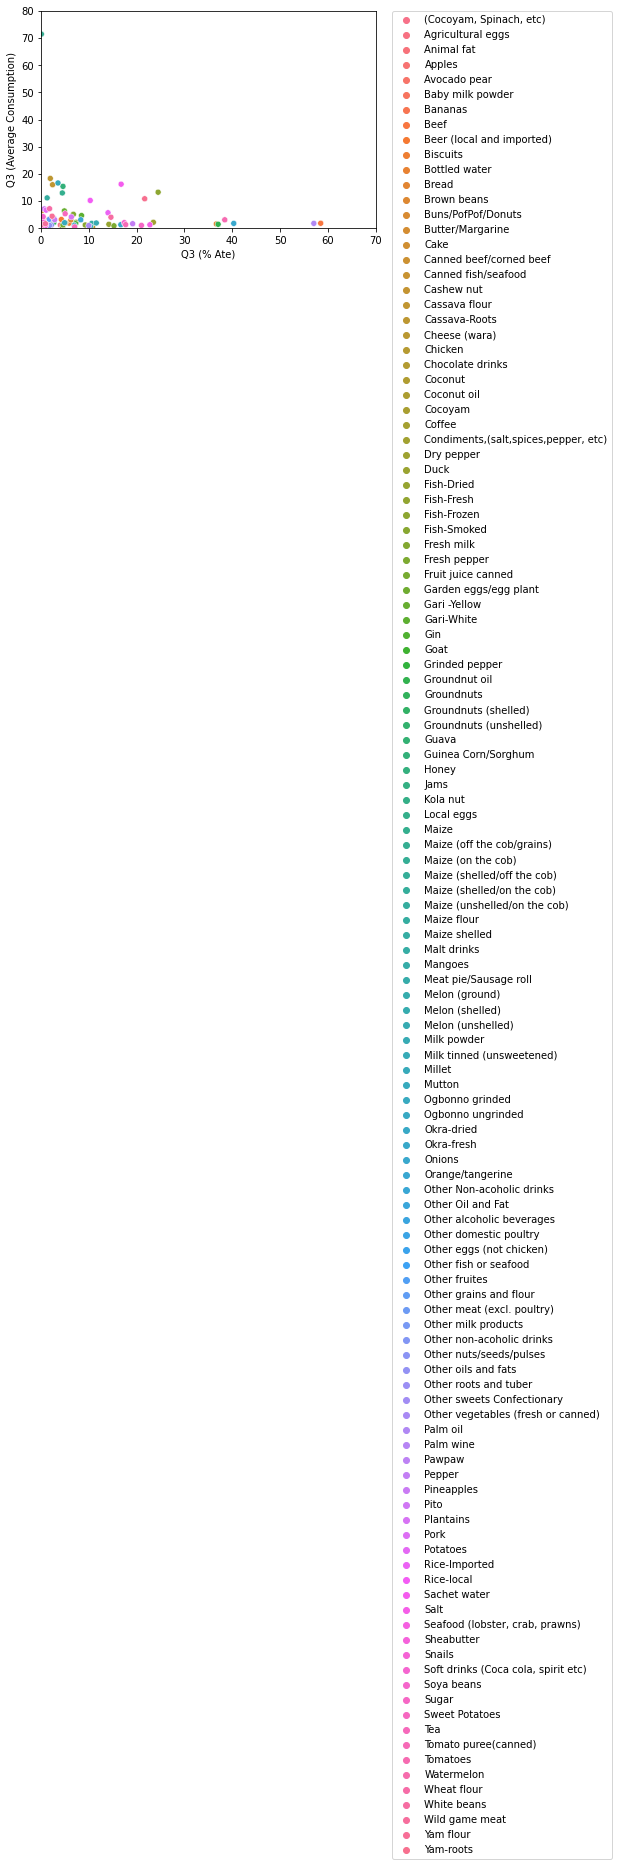

In [150]:
#Scatter plot of al goods relating to average consumption of Q3
scatter3 = sns.scatterplot(data=all_summed_nutrients, x="Q3 (% Ate)", y="Q3 (Average Consumption)", hue = 'index')
plt.ylim(0, 80)
plt.xlim(0, 70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
scatter3

<AxesSubplot:xlabel='Q4 (% Ate)', ylabel='Q4 (Average Consumption)'>

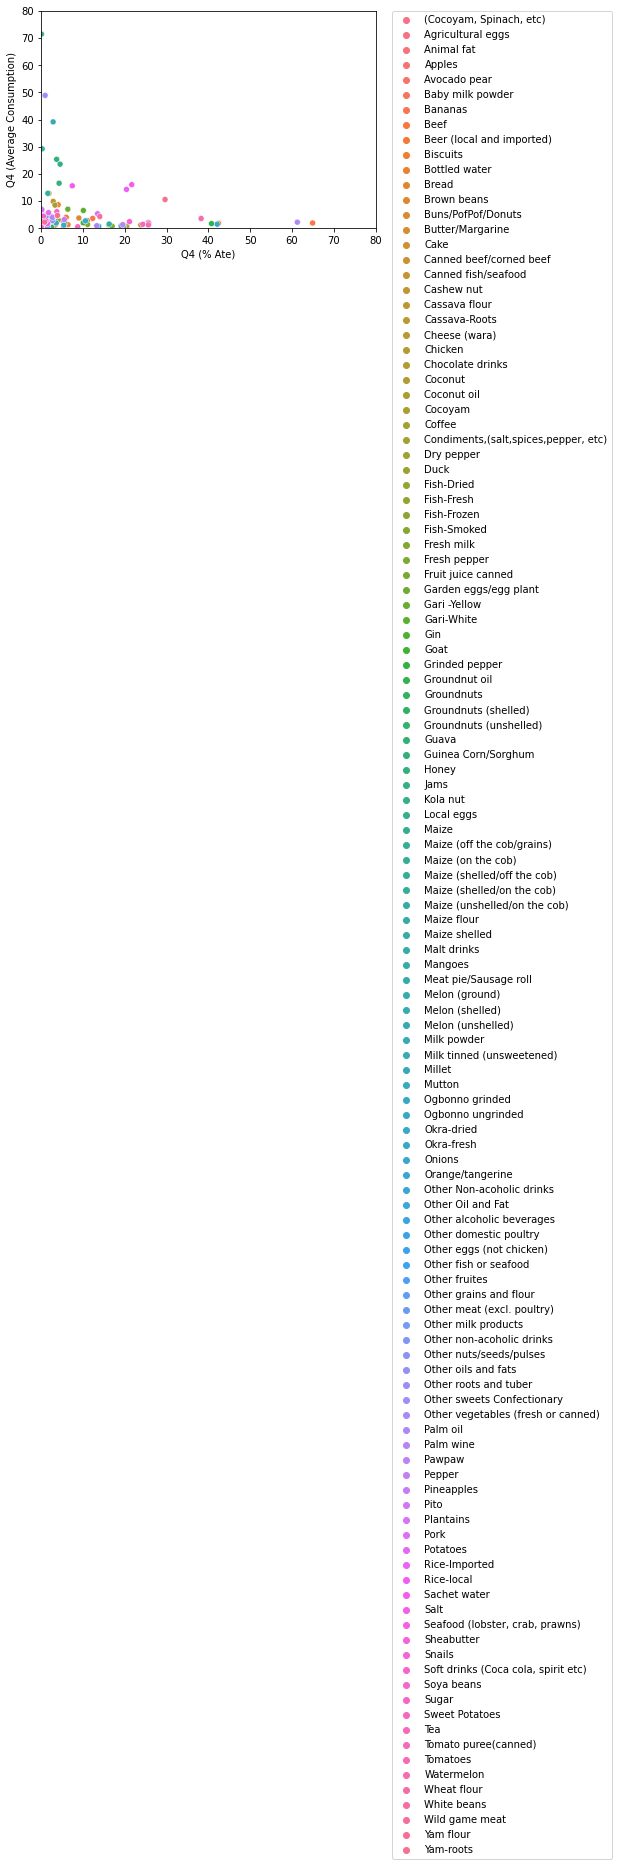

In [151]:
#Scatter plot of al goods relating to average consumption of Q4
scatter4 = sns.scatterplot(data=all_summed_nutrients, x="Q4 (% Ate)", y="Q4 (Average Consumption)", legend = 'auto', hue = 'index')
plt.ylim(0, 80)
plt.xlim(0, 80)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
scatter4

In [152]:
# nutritional df filtered by low nutrients: riboflavin, iron, zinc, and fiber
lowdf = nutritional_df.copy()
lowdf = lowdf.loc[['Zinc, Zn', 'Fiber, insoluble', 'Fiber, soluble', 'Fiber, total dietary', 'Iron, Fe', 'Riboflavin'], :] 
lowdf

(Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  \
                                                                               
Zinc, Zn                                 0.00              0.000         0.0   
Fiber, insoluble                         0.00              0.000         0.0   
Fiber, soluble                           0.00              0.000         0.0   
Fiber, total dietary                     1.20              0.000         0.0   
Iron, Fe                                 2.12              0.000         0.0   
Riboflavin                               0.00              0.391         0.0   

                      Apples  Avocado pear  Baby milk powder  Bananas   Beef  \
                                                                               
Zinc, Zn                0.00          0.64             0.660    0.150  4.230   
Fiber, insoluble        0.00          0.00             0.000    0.000  0.000   
Fiber, soluble          0.00          0.00             0.000    0.000  0.000   
Fiber, total dietary    2.10          6.70             0.000    2.600  0.000   
Iron, Fe                0.15          0.55             1.180    0.260  1.970   
Riboflavin              0.00          0.13             0.092    0.073  0.151   

                      Beer (local and imported)  Biscuits  ...  Tea  \
                                                           ...        
Zinc, Zn                                  0.010       0.0  ...  0.0   
Fiber, insoluble                          0.000       0.0  ...  0.0   
Fiber, soluble                            0.000       0.0  ...  0.0   
Fiber, total dietary                      0.000       1.3  ...  0.0   
Iron, Fe                                  0.020       2.4  ...  0.0   
Riboflavin                                0.025       0.0  ...  0.0   

                      Tomato puree(canned)  Tomatoes  Unground Ogbono  \
                                                                        
Zinc, Zn                              0.36     0.170            0.090   
Fiber, insoluble                      0.00     0.000            0.000   
Fiber, soluble                        0.00     0.000            0.000   
Fiber, total dietary                  1.90     1.200            1.600   
Iron, Fe                              1.78     0.270            0.160   
Riboflavin                            0.08     0.019            0.038   

                      Watermelon  Wheat flour  White beans  Wild game meat  \
                                                                             
Zinc, Zn                     0.0          0.0         3.54            0.00   
Fiber, insoluble             0.0          0.0         0.00            0.00   
Fiber, soluble               0.0          0.0         0.00            0.00   
Fiber, total dietary         0.4          2.6         4.30            0.00   
Iron, Fe                     0.0          0.0         4.93            0.00   
Riboflavin                   0.0          0.0         0.00            0.11   

                      Yam flour  Yam-roots  
                                            
Zinc, Zn                   0.00      0.240  
Fiber, insoluble           0.00      0.000  
Fiber, soluble             0.00      0.000  
Fiber, total dietary       1.00      4.100  
Iron, Fe                   0.72      0.540  
Riboflavin                 0.00      0.032  

[6 rows x 132 columns]

In [153]:
# function to create df for food items Nigerians eat with specified nutrient, is specific to lowdf
def get_low_df(nutrient, df):
    nutr_lst = [self for self in (lowdf.loc[nutrient]) if self>0]
    new = df.T
    nut_series = new[new[nutrient].isin(nutr_lst)].loc[:, nutrient]
    res = nut_series.reset_index().rename(columns = {'index':'Food Item'})
    return res

fiberdf = get_low_df('Fiber, total dietary', lowdf)
irondf = get_low_df('Iron, Fe', lowdf)
b12df = get_low_df('Riboflavin', lowdf)
zincdf = get_low_df('Zinc, Zn', lowdf)

In [154]:
# show df and graphs categorizing the foods Nigerians eat with specified nutrient using plotly express for highlighting feature
import plotly.express as px

# Fiber
fiberfig = px.scatter(fiberdf, x="Food Item", y="Fiber, total dietary", color="Food Item")
fiberfig.show()
fiberdf = fiberdf.sort_values(by='Fiber, total dietary',ascending=False)
fiberdf

Food Item  Fiber, total dietary
16    Fresh pepper                  25.3
57          Pepper                  25.3
15      Dry pepper                  23.3
47      Okra-dried                  20.0
13         Coconut                  13.3
..             ...                   ...
40  Melon (ground)                   0.8
61   Rice-Imported                   0.4
62      Rice-local                   0.4
67      Watermelon                   0.4
27           Honey                   0.2

[72 rows x 2 columns]

In [155]:
# Iron(Fe)
ironfig = px.scatter(irondf, x="Food Item", y="Iron, Fe", color="Food Item")
ironfig.show()
irondf = irondf.sort_values(by='Iron, Fe',ascending=False)
irondf

Food Item  Iron, Fe
81                               Pepper      9.71
29                         Fresh pepper      9.71
22                           Dry pepper      9.60
98                          White beans      4.93
9                           Brown beans      4.70
..                                  ...       ...
92  Soft drinks (Coca cola, spirit etc)      0.02
83                                 Pito      0.02
6             Beer (local and imported)      0.02
70            Other alcoholic beverages      0.01
79                             Palm oil      0.01

[101 rows x 2 columns]

In [156]:
# B-12 (Riboflavin)
b12fig = px.scatter(b12df, x="Food Item", y="Riboflavin", color="Food Item")
b12fig.show()
# b12df.sortby(columns='Riboflavin')
b12df = b12df.sort_values(by='Riboflavin',ascending=False)
b12df

Food Item  Riboflavin
25                             Goat       0.490
50         Other eggs (not chicken)       0.404
0                 Agricultural eggs       0.391
49           Other domestic poultry       0.323
40        Milk tinned (unsweetened)       0.309
..                              ...         ...
63  Seafood (lobster, crab, prawns)       0.014
62                       Rice-local       0.013
61                    Rice-Imported       0.013
48        Other alcoholic beverages       0.007
24                              Gin       0.004

[72 rows x 2 columns]

In [157]:
#zinc 
zincfig = px.scatter(zincdf, x="Food Item", y="Zinc, Zn", color="Food Item")
zincfig.show()
zincdf = zincdf.sort_values(by='Zinc, Zn',ascending=False)
zincdf

Food Item  Zinc, Zn
15                     Coffee     15.00
3                        Beef      4.23
27                       Goat      4.00
6                 Brown beans      3.71
7     Canned beef/corned beef      3.57
..                        ...       ...
59                       Pito      0.01
29              Groundnut oil      0.01
70                      Sugar      0.01
4   Beer (local and imported)      0.01
37                Malt drinks      0.01

[77 rows x 2 columns]